In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(magrittr)
library(ggplot2)
library(ggiraph)
library(plotly)
library(plyr)
library(reshape2)
library(factoextra)

OUT_DIR <- "/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/output/"
OUT_DIR2 <- "/mnt/home/yuankeji/RanceLab/reticula_new/reticula/data/GEO_model_training/output/chart"

GEO_model_training_tissue_detail.vec <- readRDS(paste(OUT_DIR,"GEO_model_training_tissue_detail_vec.Rds",sep="")) # from recount2
rxn_pca.nls <- readRDS(paste(OUT_DIR,"rxn_pca_nls.Rds",sep=""))
vst.count.mtx.train <- readRDS(paste(OUT_DIR,"vst_count_mtx_train.Rds",sep="")) # from Reactome


Attaching package: ‘plotly’

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout


Attaching package: ‘plyr’

The following objects are masked from ‘package:plotly’:

    arrange, mutate, rename, summarise

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [3]:
%%R
print(vst.count.mtx.train)

                          V1        V2        V3        V4        V5        V6
ENSMUSG00000000568 14.447457 13.087410 12.145816  9.017426 12.239331 14.224385
ENSMUSG00000000579  6.565330 10.293458  8.629326  9.017426 10.611865 11.740109
ENSMUSG00000000581 10.418204 11.485456 13.012172  9.017426 10.160367 12.587974
ENSMUSG00000000594 13.628927 12.886122 14.864012 17.982794 11.980285 11.549736
ENSMUSG00000000605 15.162889 13.108863 13.757955 20.735911 12.960394 13.846585
ENSMUSG00000000617  1.722463  3.565547  2.139524  9.017426  3.659692  6.527478
ENSMUSG00000000627 11.747930 10.257794  2.139524  9.017426 11.201639  7.334617
ENSMUSG00000000628  9.513930 10.902738  9.335100  9.017426 10.852402  8.789191
ENSMUSG00000000673  4.687207  8.755823 16.302223  9.017426  9.151146  7.886490
ENSMUSG00000000682  7.876171 12.641278  7.946106  9.017426  9.001023 14.191862
ENSMUSG00000000693  9.385880 11.219495  9.445243  9.017426 10.371541  9.540295
ENSMUSG00000000706  4.981244  1.832750  3.926441  9.

ENSMUSG00000000711 13.441253 14.769100 14.713164 26.174973 11.656269 12.868285
ENSMUSG00000000730  2.265283  2.001845  5.331543  8.489908  5.659587  5.268876
                         V79       V80       V81       V82       V83       V84
ENSMUSG00000000568 14.777984 12.731747  5.846617 12.767497 12.591015 12.328791
ENSMUSG00000000579  8.211659  5.485741 11.083954  6.343833  8.611969  9.507231
ENSMUSG00000000581 10.863927 11.754920 12.531078 12.595529 12.454665 15.494268
ENSMUSG00000000594 13.046473 13.817110 12.629617 15.570648 15.678004 14.936335
ENSMUSG00000000605 15.253317 13.426042  7.521730 14.061604 13.969461 12.952061
ENSMUSG00000000617  1.749330  2.220279  1.800084  1.907461  1.774118  2.062148
ENSMUSG00000000627 12.589770  6.789782  4.833213  4.381584  4.588701  2.062148
ENSMUSG00000000628  8.179854 16.867462  4.240505  7.587525  9.192761 14.197354
ENSMUSG00000000673  5.334196  6.609603  7.012018 17.827554 17.941533  6.319213
ENSMUSG00000000682  7.082662  7.577101  5.491092  8.

ENSMUSG00000000706  1.794995  1.805569  6.509145  3.449494  1.871607  1.740513
ENSMUSG00000000708 14.724717 12.873277 12.995546 14.086359 13.482585 15.643270
ENSMUSG00000000711 15.271675 14.071823 14.195295 14.603980 14.175815 15.478990
ENSMUSG00000000730  1.794995  5.303684  4.168433  4.937414  4.825334  1.740513
                        V157      V158      V159      V160      V161      V162
ENSMUSG00000000568 18.160727 19.543699 14.043697  2.133752 12.421416 14.069285
ENSMUSG00000000579 12.636459  8.809214  7.969342  8.261974 10.374890  8.294705
ENSMUSG00000000581 12.677216 12.452242 12.953568 12.605200 11.422799 10.432483
ENSMUSG00000000594 13.444944 12.806567 14.541831 11.604191 12.123771 12.835889
ENSMUSG00000000605 14.009625  1.955595 14.216698 15.341801 13.479992 15.249666
ENSMUSG00000000617  2.146023  4.507267  1.898895  2.133752  4.965114  3.305716
ENSMUSG00000000627  2.146023  1.955595  1.898895  9.084025  4.998142 12.496552
ENSMUSG00000000628 13.682681  1.955595  7.630390 15.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  7.422796
ENSMUSG00000000682  9.132805  5.988730  5.293366 10.131278  9.406539 10.754234
ENSMUSG00000000693  9.503368 10.025916 13.022059 10.683730  9.720922 11.082198
ENSMUSG00000000706  4.246107  3.495721  8.700332  2.717588  1.779295  1.748242
ENSMUSG00000000708 15.653744 11.327317 10.022553 13.072883 15.408185 13.726631
ENSMUSG00000000711 13.920679 13.940038 16.823037 13.255635 14.926745 14.633961
ENSMUSG00000000730  2.054866  3.495721  1.905259  5.187876  1.779295  5.426114
                        V361      V362      V363      V364      V365      V366
ENSMUSG00000000568  1.973648 13.133914 13.483204 14.062913 15.227283 16.339513
ENSMUSG00000000579  7.650105  8.272669  7.452096  7.330702  6.590744  5.067694
ENSMUSG00000000581 12.706671 12.661647 11.774059 12.097082 11.906201 12.141912
ENSMUSG00000000594 13.659573 15.246502 15.221171 12.276839 17.336603 12.672696
ENSMUSG00000000605  1.973648 13.711425 13.363864 15.565565 14.339021 13.532312
ENSMUSG00000000617  1.973648  3.320386  5

ENSMUSG00000000673 18.722689 10.603466  4.020974  4.144150  8.640944  6.175868
ENSMUSG00000000682  9.724022 13.686572  6.473098  6.176201 11.220770 10.073394
ENSMUSG00000000693 10.228845 11.167718  9.634678  9.432545 10.380245 13.464738
ENSMUSG00000000706  2.059544  1.740801  3.969094  4.729430  2.131964  3.123732
ENSMUSG00000000708 13.825527 13.048177 11.340555 11.858663 13.227509 15.143754
ENSMUSG00000000711 14.936232 14.194664 14.098570 14.270536 12.996842 13.110864
ENSMUSG00000000730  2.059544  8.159313  4.157851  3.538302  4.166595  5.954876
                        V439      V440     V441      V442      V443      V444
ENSMUSG00000000568 13.099767 17.753068 10.22530 12.875280 12.380488 13.128341
ENSMUSG00000000579  6.266803  7.641406 10.22530 11.286971 12.942334  6.587590
ENSMUSG00000000581 12.728745 13.811133 10.22530 11.512723  9.723884 12.146425
ENSMUSG00000000594 16.720159 12.192461 10.22530 13.201593 14.897027 16.226181
ENSMUSG00000000605 14.441981 14.521425 10.22530 14.101837

ENSMUSG00000000673  3.285565 18.292886  1.798056  5.653852  6.578869 18.687515
ENSMUSG00000000682  3.285565  8.882447  6.683809  9.259062  6.689466  9.533155
ENSMUSG00000000693 10.775651  9.436639  9.569990  9.337980 10.532799 10.073642
ENSMUSG00000000706  3.285565  1.847028  5.064275  3.012510  2.200773  3.508932
ENSMUSG00000000708 13.258705 15.206312 12.070857 12.210345 14.914949 15.067918
ENSMUSG00000000711 11.396806 14.989284 14.801323 13.758787 15.058428 15.076335
ENSMUSG00000000730  3.285565  1.847028  3.739667  3.897529  5.228879  1.865062
                        V517      V518      V519      V520      V521      V522
ENSMUSG00000000568 23.952216 13.408114 13.238013 13.212053 13.300679 13.594071
ENSMUSG00000000579  8.588642  3.845268 10.249234

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 14.507223 13.865672 14.029890 13.616177
ENSMUSG00000000617  1.742372  1.748356  1.879715  1.841909  2.016241  1.969361
ENSMUSG00000000627 12.157654 10.675435  4.192082  4.778654  5.525625  6.276481
ENSMUSG00000000628  9.797880  9.601359  7.957451  8.728279 16.151790 11.181616
ENSMUSG00000000673  4.339309  5.299619 18.222140 13.347028  7.017047  5.969269
ENSMUSG00000000682  7.076944  8.352936  8.747066 10.616780  8.105432 10.975365
ENSMUSG00000000693  9.515571 10.318380  9.777095 10.408259 11.680669  9.561640
ENSMUSG00000000706  4.568524  4.421778  1.879715  1.841909  2.016241  1.969361
ENSMUSG00000000708 10.458634 11.665162 15.551612 12.991492 10.999664 12.621450
ENSMUSG00000000711 14.285992 13.748147 14.894061 13.704811 14.223630 13.087347
ENSMUSG00000000730  4.659990  4.804332  1.879715  5.243756  2.016241  1.969361
                        V721      V722     V723      V724      V725      V726
ENSMUSG00000000568 14.716647 13.278960 20.19061 13.302644 13.267062 12.626537
ENSMUSG000000

ENSMUSG00000000594 15.952801 15.075552 11.945448 15.550134 16.493509 10.806814
ENSMUSG00000000605 12.701520 13.870691 14.249987 13.853849 15.276327 14.750983
ENSMUSG00000000617  3.882881  4.211685  1.833666  2.017494  2.158070 12.236035
ENSMUSG00000000627  8.289987  1.993626  4.213591  5.694423  4.286069  8.276957
ENSMUSG00000000628 13.112779  7.122640 16.624927  7.145246  8.200350 15.501444
ENSMUSG00000000673  5.200933 18.436099  4.491008 17.917967 16.448787  3.138094
ENSMUSG00000000682  5.423773  8.828485  8.263011  7.598271  8.743254  5.058252
ENSMUSG00000000693  9.301665 10.146719 10.747281 10.312017  9.192880  9.770872
ENSMUSG00000000706  4.632504  1.993626  1.833666  2.017494  2.158070  4.328715
ENSMUSG00000000708 11.689818 14.708939 14.990119 14.615105 16.081990 15.045737
ENSMUSG00000000711 13.392556 14.438321 15.280104 14.535270 14.579014 13.740957
ENSMUSG00000000730  6.743802  1.993626  5.364450  2.017494  2.158070  1.806287
                        V799      V800      V801    

ENSMUSG00000000581 12.545816 11.984957 11.977898 11.083371 10.271743 20.744067
ENSMUSG00000000594 15.518027 11.201216 12.723954 12.346541 13.180305 20.964346
ENSMUSG00000000605 14.264622 12.232559 15.092588 13.951990 14.707475 14.143574
ENSMUSG00000000617  1.852621  1.775956  2.089824  2.024890  2.826408  2.622066
ENSMUSG00000000627  4.371194  7.120831 11.821855  8.003367 11.176978  2.622066
ENSMUSG00000000628  6.496562 13.657279  7.931515 12.720457 10.286965  2.622066
ENSMUSG00000000673 12.793668  1.775956  4.008142  6.826762  5.535557  2.622066
ENSMUSG00000000682  9.136115  1.775956  5.912147  9.588700  9.402578  6.699469
ENSMUSG00000000693 10.140662 14.867127  9.490319 11.271984  9.470692  8.061956
ENSMUSG00000000706  3.433476  9.575128  4.008142  2.024890  5.204859 10.880981
ENSMUSG00000000708 13.572025 10.969523 12.050034 13.889010 12.102104  2.622066
ENSMUSG00000000711 14.186194

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  9.535806
ENSMUSG00000000693  9.797985 10.189444 11.023826 10.619621 10.244703  9.984376
ENSMUSG00000000706  5.181710  3.809364  1.830018  1.834099  3.621149  1.871497
ENSMUSG00000000708 12.102354 12.592594 10.177229 12.917182 15.029812 14.291178
ENSMUSG00000000711 14.518823 13.082291 14.658609 13.468896 14.687993 14.939887
ENSMUSG00000000730  3.837100  5.207105  4.352760  4.887111  2.014194  1.871497
                       V1075     V1076     V1077     V1078     V1079     V1080
ENSMUSG00000000568 14.764100 11.183730 11.295822 15.106199 14.708250 14.707545
ENSMUSG00000000579 10.125363 10.527053  9.146886  6.990278  6.940646  9.015476
ENSMUSG00000000581 11.890491 13.206937 10.977005 12.013793 10.821002 14.197062
ENSMUSG00000000594 10.859989 13.774733 14.608061 13.036999 13.505165 14.203844
ENSMUSG00000000605 14.712911 11.482461 13.299694 15.555284 15.046975 14.798269
ENSMUSG00000000617 14.385171  1.907573  5.270771  1.840750  1.722718  1.767666
ENSMUSG00000000627  9.538771  1.907573  6

ENSMUSG00000000673  5.612764 18.309544  5.951553  5.705010  5.507795  9.000101
ENSMUSG00000000682  8.934396 10.452275  8.628062 10.372654 10.712020 21.063926
ENSMUSG00000000693 10.912800  9.648376 11.146346  9.795137  9.575218  8.573822
ENSMUSG00000000706  1.925770  1.818570  6.333167  4.567167  3.629726  5.153312
ENSMUSG00000000708 13.249924 15.439527 13.653367 13.272847 12.156224 16.694576
ENSMUSG00000000711 14.102765 15.382852 14.342382 13.089881 13.039634 14.413758
ENSMUSG00000000730  5.802940  1.818570  5.450038  4.192888  5.670219  5.406213
                       V1153     V1154     V1155     V1156     V1157     V1158
ENSMUSG00000000568  3.595915 11.603724 14.304876 12.769912 15.713349 12.861377
ENSMUSG00000000579  3.595915  9.220061  6.634561  7.986654  7.510157  7.150006
ENSMUSG00000000581 15.801191 11.543331 11.420710 11.454020 12.321382 11.193998
ENSMUSG00000000594 19.737341 14.442901 11.556352 15.247886 13.673975 15.095422
ENSMUSG00000000605 13.563582 13.611637 14.304663 14.

ENSMUSG00000000627  2.178001  9.210061  5.837654 14.158483  5.771057  2.048555
ENSMUSG00000000628  7.969686 10.828237 14.311767  9.857889 17.015140  2.048555
ENSMUSG00000000673 17.636155  3.698548  7.912604  3.513023  6.445974  7.102526
ENSMUSG00000000682 10.340895  5.457244 11.086718  1.890258  8.155305 17.369879
ENSMUSG00000000693  9.676332  9.866651 11.449531 10.061691 10.500533  2.048555
ENSMUSG00000000706  2.178001  1.801532  1.862762  1.890258  2.310600  4.310678
ENSMUSG00000000708 15.454582 14.209415 12.995084 12.088523 14.333595 15.299526
ENSMUSG00000000711 14.441663 13.893126 13.625312 14.787231 14.844802 15.458411
ENSMUSG00000000730  2.178001  1.801532  6.133480  1.890258  4.574789  4.713016
                       V1231     V1232     V1233     V1234     V1235     V1236
ENSMUSG00000000568 12.583141 14.515421 13.632438 14.046534 12.777986 12.473160
ENSMUSG00000000579 10.044588  7.674643  8.228883 11.773728  7.440245  8.883700
ENSMUSG00000000581 11.792785 10.724506 11.790032

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  6.588924
ENSMUSG00000000581 13.141683 11.399018 13.285903 12.141495 11.631638 12.626185
ENSMUSG00000000594 11.000240 15.292350 16.248534 13.117204 12.341518 15.869140
ENSMUSG00000000605 14.489958 13.326394 13.696199 15.368152 13.324308 14.006228
ENSMUSG00000000617  1.854616  4.023097  1.864657  1.832185  3.157622  2.318868
ENSMUSG00000000627  6.154177  4.023097  5.431240 12.877686  6.399618  6.588924
ENSMUSG00000000628 17.503284  4.023097  7.805218  9.407955 14.246443  7.413428
ENSMUSG00000000673  5.260534 17.254848 19.079421  4.885209  6.364457 17.817512
ENSMUSG00000000682  6.964931  8.539949 10.096850  5.966415  9.244155  6.064049
ENSMUSG00000000693 10.585458  9.603251 10.184143  9.861526  9.584926  9.581267
ENSMUSG00000000706  1.854616  4.023097  1.864657  1.832185  4.445453  2.318868
ENSMUSG00000000708 14.573178 15.283585 13.775381 11.423268 12.808722 14.197494
ENSMUSG00000000711 15.477495 13.110554 14.986417 14.501790 13.240206 14.066769
ENSMUSG00000000730  4.011591  4.023097  1

ENSMUSG00000000568 13.701474 10.500918 14.652910 11.742586 17.480840 14.814101
ENSMUSG00000000579  8.593675 12.416525  9.578058 11.551849  7.856705  6.933933
ENSMUSG00000000581 13.194406 13.277810 11.954415 12.404551 12.997584 10.830813
ENSMUSG00000000594 15.712877 15.665564 12.914036 13.351025 15.265311 12.556226
ENSMUSG00000000605 14.864467  9.667581 14.627965 12.902620  7.140719 14.448155
ENSMUSG00000000617  1.712083  2.254129  1.804946  1.789555  1.791772  1.738409
ENSMUSG00000000627  4.067975  4.595491 12.391975  4.611654  7.047343 11.939232
ENSMUSG00000000628  8.269479  2.254129  8.332947 12.176164 14.544272 10.364699
ENSMUSG00000000673 17.544091 14.193736  4.936550  4.825635  2.939994  5.042199
ENSMUSG00000000682  9.685475  9.372263  5.510882  9.215029  6.707737  6.579829
ENSMUSG00000000693  9.822910  7.995754  9.865358 10.249237  9.337590  9.213491
ENSMUSG00000000706  1.712083  5.895971  5.446219  1.789555  1.791772  4.167195
ENSMUSG00000000708 15.766703 14.837289 11.741102 11.

                       V1585     V1586     V1587     V1588     V1589     V1590
ENSMUSG00000000568 19.312065 14.137737 13.131085 13.378981 13.682815 13.553813
ENSMUSG00000000579  7.331670  7.268804  5.808009  9.504870  9.309886  9.517005
ENSMUSG00000000581 10.839072 12.338404 14.178894 13.015573  9.905721 12.614532
ENSMUSG00000000594 10.780403 14.057902 13.044707 12.976925 15.548350 16.131534
ENSMUSG00000000605 15.390047 15.018355 17.068723 14.236967 13.102534 13.637117
ENSMUSG00000000617  2.045407  1.960128  3.018474  1.813692  4.185827  1.798631
ENSMUSG00000000627 14.028609 12.026175  9.734188  5.386702  8.076074  5.880476
ENSMUSG00000000628 11.921361  8.120525 17.924801 16.902088 13.291196 15.031751
ENSMUSG00000000673  5.621174  6.443433  9.075108  5.145255  5.357453  7.081434
ENSMUSG00000000682  8.685910  8.306271 16.435168  8.708251  5.094594 11.690812
ENSMUSG00000000693  9.896658 10.147141 19.277099 11.111619

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 10.116641
ENSMUSG00000000706  3.451563  1.796298  1.792186 10.565742  6.541628  3.960719
ENSMUSG00000000708  3.451563 12.934724 14.605655 13.204942 15.916549 10.790533
ENSMUSG00000000711 12.443322 13.042605 13.832668 13.876164  8.257103 13.979734
ENSMUSG00000000730  3.451563  3.931196  1.792186  5.592371 12.431153  4.315574
                       V1789     V1790     V1791     V1792     V1793     V1794
ENSMUSG00000000568 15.068897 21.882412 15.859355 13.108075 12.659073  5.903829
ENSMUSG00000000579  5.863356 21.199438  8.797948  9.950092  8.631061 11.819348
ENSMUSG00000000581 12.774485 22.402793 11.053584 11.585309 11.876813 13.086386
ENSMUSG00000000594 12.963106  5.704553 16.975930 11.874735 14.165452 15.237588
ENSMUSG00000000605 15.631339 13.786386 20.157645 13.119337 13.533982 13.576548
ENSMUSG00000000617  3.512223  5.704553  2.050366  4.784829  1.754272  2.135943
ENSMUSG00000000627 12.002750  5.704553 16.802791  4.991923  6.951885  2.135943
ENSMUSG00000000628  8.432369 22.316237 13

ENSMUSG00000000682  6.822311 13.112227  7.330711  6.755180 10.505646  6.357433
ENSMUSG00000000693 10.594946 10.579499 10.198675  9.950124  9.535772  9.001301
ENSMUSG00000000706  3.572512  4.156205  2.309930  2.082210  1.886485  4.750235
ENSMUSG00000000708 13.220498 13.483587 15.111060 14.719461 14.579654 12.656957
ENSMUSG00000000711 12.825352 13.118160 13.784913 14.403266 14.701093 14.540138
ENSMUSG00000000730  5.604146  4.745558  2.309930  2.082210  1.886485  2.056204
                       V1867     V1868     V1869     V1870     V1871     V1872
ENSMUSG00000000568 12.206681  7.975489 13.969675 14.254571 12.698840 13.237759
ENSMUSG00000000579  9.384922 11.162953  9.365203  6.684412  8.557704 11.775243
ENSMUSG00000000581 11.915378 12.251420 13.988787 12.471131 12.392260 10.506621
ENSMUSG00000000594  9.458165 15.487522 15.894901 14.347088 15.871210 12.061550
ENSMUSG00000000605 14.463988  9.484455 14.036462 15.099377 13.785754 13.107109
ENSMUSG00000000617  1.963524  4.640717  1.972295  1.

ENSMUSG00000000673 17.378904 16.833156 17.227809 10.12998  7.524755  6.060562
ENSMUSG00000000682  9.492692  9.724913  9.885506 10.12998 10.731190  7.312428
ENSMUSG00000000693  9.563672  9.631898  9.097786 10.12998 10.110166 10.358709
ENSMUSG00000000706  2.060488  1.911570  2.058710 10.12998  2.891459  2.098259
ENSMUSG00000000708 15.726136 15.474117 15.789717 10.12998 14.163628 14.812541
ENSMUSG00000000711 14.432572 14.512070 14.503912 18.33990 13.913546 13.300575
ENSMUSG00000000730  2.060488  1.911570  2.058710 10.12998  2.071685  5.146665
                       V1945     V1946     V1947     V1948     V1949     V1950
ENSMUSG00000000568  9.620906 14.218058 13.060375 13.744700 12.527429 12.574209
ENSMUSG00000000579 22.433388  6.993045 10.236706 12.671194  5.284600  8.401531
ENSMUSG00000000581  9.620906 12.783822 11.522396 11.524997 13.234098 12.348362
ENSMUSG00000000594 19.316210 11.198040 11.152790

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 10.365967 10.14544
ENSMUSG00000000594 15.777246 15.083787 17.873444 15.655185 12.447757 10.14544
ENSMUSG00000000605 12.352141 14.330453 12.364359 14.158135 13.356103 10.14544
ENSMUSG00000000617  4.546963  1.814577  1.951464  2.074555  1.863271 10.14544
ENSMUSG00000000627  2.102629  5.388626  1.951464  2.074555  4.260449 10.14544
ENSMUSG00000000628 15.008259  9.326060 10.317525  7.408611 14.956871 10.14544
ENSMUSG00000000673  2.102629 18.225278  6.854306 17.182129  4.728266 10.14544
ENSMUSG00000000682 11.550737 10.418015 11.894101  8.728915 11.013727 10.14544
ENSMUSG00000000693 11.221397  9.920332  9.443762 10.366153  9.242117 10.14544
ENSMUSG00000000706  5.979413  1.814577  4.635982  2.074555  5.811533 10.14544
ENSMUSG00000000708  6.901340 14.633935 13.822780 14.655101 11.518184 10.14544
ENSMUSG00000000711 16.822809 14.417814 16.013515 14.147520 13.843873 10.14544
ENSMUSG00000000730  4.863258  3.192728  5.565124  2.074555  4.057031 10.14544
                       V2149     V2150     V

ENSMUSG00000000579 10.230809  7.526091  7.896747  7.795440  9.904432  6.703933
ENSMUSG00000000581 12.164024 12.911223 10.337740 15.152427 12.527256 12.877864
ENSMUSG00000000594 15.688104 13.359335 12.730402 14.765754 13.133106 15.312981
ENSMUSG00000000605 13.261534  2.046330 12.605940 15.035142 13.263348 13.197677
ENSMUSG00000000617  5.936450  2.046330  1.896063  4.568201  1.902877  1.908085
ENSMUSG00000000627  8.936221  2.046330 10.100706  2.245991  6.837147  4.392079
ENSMUSG00000000628 13.450889  2.046330 11.319900  4.430535 15.042242 15.398715
ENSMUSG00000000673 10.759561  4.702121  8.828913  2.245991  6.351994 17.771025
ENSMUSG00000000682 13.643365  9.776468 10.643033  2.245991  9.811205 10.711744
ENSMUSG00000000693 10.516625  2.046330 10.175369  9.558736 11.025994 12.437328
ENSMUSG00000000706 10.250651  2.046330  3.190991  4.568201  1.902877  1.908085
ENSMUSG00000000708 13.411722 11.628254 12.982218  2.245991 13.111998 14.303803
ENSMUSG00000000711 13.667379 14.784229 12.616002 15.

                       V2299     V2300     V2301     V2302     V2303     V2304
ENSMUSG00000000568 13.006304 15.154384 13.500568 14.988323  2.241254 14.758214
ENSMUSG00000000579  8.676619  6.033177  9.121271  7.947567 12.693722 10.309201
ENSMUSG00000000581 12.651828 11.365213 12.934243 12.102828 13.189910 11.692913
ENSMUSG00000000594 15.445081 13.277052 15.484047 15.306522 15.380038 11.275747
ENSMUSG00000000605 14.094377 15.273295 13.855784 15.450718 13.621337 13.000805
ENSMUSG00000000617  1.776062  4.166156  2.018552  1.969089  4.355646  1.761672
ENSMUSG00000000627  4.708835 13.107092  2.018552 11.250449  2.241254  3.069926
ENSMUSG00000000628  8.550305  9.213238  6.543081  8.848884  8.821440 12.802752
ENSMUSG00000000673 17.914959  5.045717 18.264480  5.149265 15.258242  5.836139
ENSMUSG00000000682  9.731687  6.361648  6.865242  7.976860  2.241254  6.976525
ENSMUSG00000000693  9.746886  9.841789  9.776402  9.558874  9.445050  9.671243
ENSMUSG00000000706  1.776062  4.314709  2.018552

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 10.550826 11.042697
ENSMUSG00000000706  1.917387  2.033595  1.987246  4.014916  1.953172  2.100100
ENSMUSG00000000708 14.557454 14.628883 14.613584 15.922951 12.328727 13.512466
ENSMUSG00000000711 13.884973 13.826839 14.191602 14.963980 15.846363 14.439097
ENSMUSG00000000730  1.917387  7.157670  1.987246  4.014916  4.215782  4.070233
                       V2503     V2504     V2505     V2506     V2507     V2508
ENSMUSG00000000568  2.204087 18.364381 13.096242  5.555369 12.093555 13.626270
ENSMUSG00000000579 12.463917  4.720563 10.773680 11.719086  6.931159  7.839998
ENSMUSG00000000581 13.523508 14.770451 11.923817 13.620876 11.751677 12.972612
ENSMUSG00000000594 15.441022 13.966422 13.418692 15.358829 12.396973 11.865457
ENSMUSG00000000605 13.860279 19.293489 12.902425 11.519554 14.300273 14.363229
ENSMUSG00000000617  2.204087  3.482533  2.011162  1.994913  1.866595  1.907728
ENSMUSG00000000627  2.204087 14.393261  7.074443  1.994913  4.550707  4.604354
ENSMUSG00000000628 16.186795 11

ENSMUSG00000000682 14.785655  2.424710  9.890321 10.32163 10.098478  8.667881
ENSMUSG00000000693 10.940473 10.785366 10.635532 10.32163  9.519856 10.059912
ENSMUSG00000000706  4.848200  2.424710  1.965556 10.32163  4.922973  2.113667
ENSMUSG00000000708 13.231530  2.424710 13.346013 10.32163 13.070886 14.139643
ENSMUSG00000000711 13.487964 19.089377 14.221595 10.32163 13.011378 13.387756
ENSMUSG00000000730  6.646006  8.245754  6.657614 10.32163  2.001457  2.113667
                       V2581     V2582     V2583     V2584     V2585     V2586
ENSMUSG00000000568 13.632555 11.958822 12.851080 12.591765 12.122853 13.781755
ENSMUSG00000000579 14.177952  9.388363 10.854028  2.258408  6.176820  5.610377
ENSMUSG00000000581  8.642492 12.053746 12.799322 16.501821 14.098734 12.710310
ENSMUSG00000000594 15.145211 15.420143 10.736186 18.969079 16.642389 12.400224
ENSMUSG00000000605 13.629912 14.841172 14.774843 13.571173 16.710408 13.796248
ENSMUSG00000000617  6.218141  4.694848 12.357663  2.258408

ENSMUSG00000000628 14.885060 10.689193  7.805204 12.294717  3.598993 14.692000
ENSMUSG00000000673  7.213082  8.364264  4.970094  5.667821 17.504199  6.966305
ENSMUSG00000000682 11.447515 11.247939  7.387533  7.293898  5.916442 10.640902
ENSMUSG00000000693 12.549644  9.767206  9.813625  9.632399  9.611406 11.199567
ENSMUSG00000000706  3.300246  4.685747  2.098062  3.485341  1.988045  3.138090
ENSMUSG00000000708 13.518104 12.206765 11.626160 14.905126 15.591514 14.306352
ENSMUSG00000000711 13.827462 15.658826 13.905013 13.664866 14.840669 13.762627
ENSMUSG00000000730  7.853852  1.955137  2.098062  1.787783  3.578700  7.416437
                       V2659     V2660     V2661     V2662     V2663     V2664
ENSMUSG00000000568 14.734990 17.468109 13.265355 13.910917 12.691800 13.717551
ENSMUSG00000000579  6.750665  8.250606 11.514858 10.097952  8.074423 10.344448
ENSMUSG00000000581 11.764945 13.886723 10.679498 13.180919 12.000168  8.807632
ENSMUSG00000000594 13.000556 14.396815

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




ENSMUSG00000000605 15.383799 15.009951 15.946564 15.182807 15.436691 13.353222
ENSMUSG00000000617  2.786159  2.023342  1.928921  2.139511  2.035134  1.746707
ENSMUSG00000000627 12.031721  5.536903 12.259859 11.751611 11.782550  4.762457
ENSMUSG00000000628  9.685806 17.853776  8.340949  8.228984  8.900254 13.759082
ENSMUSG00000000673  4.924876  3.745448  3.341443  2.139511  2.035134  8.209120
ENSMUSG00000000682  8.157655  5.542061  6.996995  6.653885  6.017570 10.000452
ENSMUSG00000000693  9.474030 10.193395  9.263322  9.906168  9.660710 10.706347
ENSMUSG00000000706  4.398987  3.586665  4.942333  2.139511  4.923954  1.746707
ENSMUSG00000000708 11.774126 15.665492 11.870634 11.644776 12.385210 13.435428
ENSMUSG00000000711 14.093521 15.380481 14.453251 13.870563 14.271959 14.479204
ENSMUSG00000000730  5.446088  3.745448  4.185812  2.139511  2.909148  8.311449
                       V2863     V2864     V2865     V2866     V2867     V2868
ENSMUSG00000000568 13.788955 13.458720 11.619133 13

ENSMUSG00000000581 12.178903 17.041878 11.573840 15.157570 13.999071 13.915165
ENSMUSG00000000594 12.485502 17.936258 15.544217  9.778162 14.873104 14.860776
ENSMUSG00000000605 14.579360 13.239588 17.811418  7.344022 14.760579 15.206592
ENSMUSG00000000617  2.678937  2.072420  1.899583  1.819702  2.077238  2.020312
ENSMUSG00000000627 11.845651  2.072420  8.859574  8.312445  3.865679  4.076488
ENSMUSG00000000628  8.480439  2.072420 19.384993 12.025796  8.320127  8.579297
ENSMUSG00000000673  3.677594  7.500367 13.420844  4.514873 17.226740 18.439291
ENSMUSG00000000682  6.002705  2.072420  1.899583  6.639912  9.586031  9.920137
ENSMUSG00000000693 10.047435  8.282932 14.617777  9.926582  9.464036 10.893127
ENSMUSG00000000706  4.734948  2.072420  1.899583  2.883353  4.067442  2.020312
ENSMUSG00000000708 12.029533 11.295151 12.872305  8.678153 15.992663 14.201605
ENSMUSG00000000711 13.847229 20.307890 13.436889  9.630401 14.155883 12.511868
ENSMUSG00000000730  3.760138  2.072420  1.899583  7.

ENSMUSG00000000568 12.417939 12.928235 12.803809  8.465837 13.924681 15.103727
ENSMUSG00000000579  7.601878  8.613026 10.082621 10.719984 10.438072  9.322143
ENSMUSG00000000581 12.206160 13.500383 11.348951 13.147276 12.908201 16.660203
ENSMUSG00000000594 15.150722 16.032713 14.785299 13.555167 11.187681 13.714047
ENSMUSG00000000605 13.682232 13.292756 12.669224 14.070760 14.547350 17.079959
ENSMUSG00000000617  2.485732  2.924740  5.829155  1.921512  1.897411  2.935359
ENSMUSG00000000627  2.485732  2.924740  8.251492 12.417513  4.984283  2.935359
ENSMUSG00000000628  9.158715  6.454562 15.316747 19.493829 18.642088  2.935359
ENSMUSG00000000673 16.882898 13.997261  9.771314  1.921512  3.515250  2.935359
ENSMUSG00000000682  8.491175  9.848955 12.874927  1.921512  5.255658  2.935359
ENSMUSG00000000693  9.668734  9.530989 11.528332 11.746036 10.012268  2.935359
ENSMUSG00000000706  2.485732  2.924740  1.775932  4.715265  1.897411  2.935359
ENSMUSG00000000708 14.670961 13.305276 13.025983  6.

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  7.574864  8.204880  9.091515  5.848494
ENSMUSG00000000581 10.626350 11.283508 12.362777 10.207783 12.102503 11.872065
ENSMUSG00000000594 11.899382 11.977820 15.239588 17.279235 15.258032 13.123571
ENSMUSG00000000605 12.910010 13.199409 13.541281 14.020083 13.404850 15.209512
ENSMUSG00000000617  3.951494  3.178461  4.442101  1.980537  6.867138  1.821115
ENSMUSG00000000627  5.690239  7.203886  5.134629  4.988799  8.285665 12.616866
ENSMUSG00000000628 13.064912 13.627879 13.900088  8.155277 14.671191  8.790405
ENSMUSG00000000673  7.633236  6.455316  8.756251 18.243506 10.518559  4.170998
ENSMUSG00000000682 10.664724  9.656188 11.891982  7.825527 13.252737  6.269434
ENSMUSG00000000693  9.977441  9.913397 11.530339  9.276139 10.310839  9.842397
ENSMUSG00000000706  3.514056  4.666078  4.285948  1.980537  7.297095  4.375428
ENSMUSG00000000708 12.207203 12.220990 14.077314 13.934468 13.852646 10.939522
ENSMUSG00000000711 12.118738 13.704035 13.964378 16.537243 13.811759 14.484977
ENSMUSG0000

ENSMUSG00000000568 12.271388 13.581804 12.851916 12.471429 12.832235 13.865861
ENSMUSG00000000579  6.547813  9.333814  8.388770  8.131081  9.112267 10.182905
ENSMUSG00000000581 12.971725  9.552019 10.988162 11.887962 12.384313 12.118763
ENSMUSG00000000594 15.739535 16.850506 14.116193 15.327327 15.506604 12.324266
ENSMUSG00000000605 12.821920 12.063132 13.630887 13.058181 14.030527 13.084148
ENSMUSG00000000617  2.965931  3.099349  3.324890  1.722501  1.757673  3.191281
ENSMUSG00000000627  2.965931  8.803039  5.619962  5.439080  3.932283  5.041158
ENSMUSG00000000628  2.965931 14.424402 15.194550 13.294785  8.071000 11.734081
ENSMUSG00000000673 14.582917  4.863232  7.358090  8.306821 14.800168  5.428652
ENSMUSG00000000682  9.977739  6.281098  9.823430 11.040154  8.943121 11.549303
ENSMUSG00000000693  9.973696 10.044201 12.571913 10.892904  9.395814  9.804698
ENSMUSG00000000706  2.965931  5.244635  1.769578  2.758427  1.757673  3.203660
ENSMUSG00000000708 13.442019 11.898943 13.001434 13.

ENSMUSG00000000730  1.821528  4.782603  1.845842  6.341348  2.198304  4.915807
                       V3373     V3374     V3375     V3376     V3377     V3378
ENSMUSG00000000568 13.620638 12.704562 13.141392 12.504262 13.197756 13.511705
ENSMUSG00000000579  8.202953 10.288626  8.522065  8.393054  8.873887  4.603116
ENSMUSG00000000581 13.296436 11.618100 10.691102 12.127685 11.563988 13.373051
ENSMUSG00000000594 15.356271 11.932321 13.054194 14.719315 12.863679 14.961310
ENSMUSG00000000605 14.506907 13.260565 13.075928 13.499785 13.295417 14.093976
ENSMUSG00000000617  1.812322  1.989497  4.883401  1.744245  5.037188  2.264431
ENSMUSG00000000627  4.709441  4.422969 11.270740  5.461067  8.030953  4.603116
ENSMUSG00000000628  7.061663 11.838166  9.857445 15.859162 13.245651  7.254307
ENSMUSG00000000673 17.923986  6.197766  8.213329  5.748223  4.930265 17.676482
ENSMUSG00000000682  9.459898 10.857913 12.028839  8.808318 10.644320  8.006483
ENSMUSG00000000693  9.087990

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  4.103057  4.374228
ENSMUSG00000000708 12.991644 15.067031 14.820143 13.528971 12.739387 13.238645
ENSMUSG00000000711 13.525270 14.962463 14.978530 13.596861 14.642957 13.814266
ENSMUSG00000000730  7.505983  1.810038  1.835053  5.599051  4.672291  4.423323
                       V3571     V3572     V3573     V3574     V3575     V3576
ENSMUSG00000000568 11.386572 13.553998 12.915840 12.880192 12.177872 12.018103
ENSMUSG00000000579  7.349824  9.714571  5.500645  6.904732  2.056035 11.204077
ENSMUSG00000000581 12.481852 10.758899 13.036666 12.137289 13.251501 11.074568
ENSMUSG00000000594 15.412955 14.107778 14.607660 15.033990 14.019397 12.625408
ENSMUSG00000000605 14.276180 12.883938 14.483490 13.848403 12.611646 13.662783
ENSMUSG00000000617  2.037919  1.909038  1.974471  4.083395  4.524641  2.049347
ENSMUSG00000000627  2.037919 10.765036  3.878091  5.231717  9.550704  7.625525
ENSMUSG00000000628  8.407170 11.024166 10.467505  8.437093 18.131442 13.094040
ENSMUSG00000000673 17.449455  8

ENSMUSG00000000693  9.609255 10.657038  9.801394 12.154470 11.849723 10.211891
ENSMUSG00000000706  1.997271  3.874209  2.186930  7.190242  5.252036  1.920861
ENSMUSG00000000708 12.678412 14.985504 11.355928 12.967047 14.718271 14.601582
ENSMUSG00000000711 12.556543 13.842024 14.831899 12.621186 15.447905 14.554387
ENSMUSG00000000730  5.684553  3.852542  2.186930  2.034220  3.149813  1.920861
                       V3649     V3650     V3651     V3652     V3653     V3654
ENSMUSG00000000568 12.530306 12.148912 12.472346 13.006380 13.364097 13.451460
ENSMUSG00000000579 11.342901  9.263514  5.744279  7.259181  8.926862  9.252559
ENSMUSG00000000581 11.407337 12.282812 12.708692 13.968307 11.638268 12.080992
ENSMUSG00000000594 11.251119 15.290146 15.492706 16.452618 14.786406 15.204685
ENSMUSG00000000605 13.506453 14.752059 14.253508 13.813157 13.339436 13.260050
ENSMUSG00000000617  3.711842  1.983906  2.122525  2.293180  4.239379  2.164580
ENSMUSG00000000627  6.809226  1.983906  2.122525  5.

ENSMUSG00000000673  5.524492  8.174719 17.725002  7.759911  7.682483 16.785594
ENSMUSG00000000682  7.587355 11.578468  9.864015 26.186506 12.512157  8.977640
ENSMUSG00000000693  9.378519 10.521890  9.848896  7.759911 10.569524  8.427314
ENSMUSG00000000706  4.032331  1.749788  1.815149  7.759911  1.818034  1.905530
ENSMUSG00000000708 14.759598 13.581535 14.999116  7.759911 12.985841 15.794912
ENSMUSG00000000711 13.510389 14.245863 14.981200  7.759911 13.711653 15.126370
ENSMUSG00000000730  1.770650  4.936433  3.196464  7.759911  4.777785  1.905530
                      V3727     V3728     V3729    V3730     V3731     V3732
ENSMUSG00000000568 9.898937 12.811964 14.072007 10.05187 13.084889 13.989344
ENSMUSG00000000579 9.898937  7.410243  5.579819 10.05187  8.284636 11.387939
ENSMUSG00000000581 9.898937  9.545085 13.295751 10.05187 13.088086 12.630676
ENSMUSG00000000594 9.898937 16.653503 14.539690 19.43111 16.465070 18.469318
ENSMUSG00000000605 9.898937 12.502900

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 13.115488
ENSMUSG00000000711 13.560161 15.555814  9.704364  7.637836 14.186714 13.770261
ENSMUSG00000000730  6.767622  1.972632  9.704364  7.637836  3.382444  5.662046
                       V3925     V3926     V3927     V3928     V3929    V3930
ENSMUSG00000000568 13.045971 12.786726 12.827344 14.807016 12.376279 10.34787
ENSMUSG00000000579  9.843443 10.124793  8.938925  8.042073  7.272755 10.34787
ENSMUSG00000000581 11.681712 11.812782 11.761012 11.848768 12.096909 10.34787
ENSMUSG00000000594 11.570658 10.889013 14.557657 12.413092 15.800587 18.60317
ENSMUSG00000000605 13.614303 13.331800 13.273949 15.248845 14.165240 10.34787
ENSMUSG00000000617  3.906240  1.921823  1.776196  1.746752  2.199967 10.34787
ENSMUSG00000000627  5.331261  6.196383  6.791240 12.788259  2.199967 10.34787
ENSMUSG00000000628 12.967690 16.212608 13.997376  8.874173  8.573461 10.34787
ENSMUSG00000000673  7.462724  5.696052  6.008888  4.258763 15.083541 10.34787
ENSMUSG00000000682 10.715390  7.184591 17.627814  5

ENSMUSG00000000708 17.079922 13.500679 13.939605 14.807264 13.627856 14.019959
ENSMUSG00000000711  6.230857 13.334206 13.369240 14.269799 12.798166 13.250803
ENSMUSG00000000730 11.640158  2.241236  1.912206  2.063712  4.963532  2.113089
                       V4003     V4004     V4005     V4006     V4007     V4008
ENSMUSG00000000568 14.755385 11.146337 12.350948 12.864242 13.138693 13.808766
ENSMUSG00000000579 10.309958 10.203170  7.434350  7.879665  9.625355  7.555443
ENSMUSG00000000581 11.929704 11.080573 12.929176 12.375290 12.474015 13.247025
ENSMUSG00000000594 10.790124 14.096839 15.546971 14.850856 16.458832 15.150947
ENSMUSG00000000605 14.901771 13.092710 13.945263 13.882971 13.356081 14.211568
ENSMUSG00000000617 14.311701  5.355195  2.133214  1.968061  2.161844  1.903760
ENSMUSG00000000627  9.326436  8.434885  4.171208  7.888512  2.161844  1.903760
ENSMUSG00000000628 15.628678 10.633487  8.582344 10.037925 15.122894  7.263011
ENSMUSG00000000673  5.362824 12.303029 17.464912  7.

ENSMUSG00000000693 11.861295  9.201197 10.164596  7.925168  9.653566 11.026699
ENSMUSG00000000706  1.794539  1.986573  3.262154  5.267537  1.782843  7.426613
ENSMUSG00000000708 12.281065 12.373442 10.638853 12.884260 14.567629 10.992619
ENSMUSG00000000711 13.796890 13.092763 14.236411 14.527750 15.211718 13.786391
ENSMUSG00000000730  7.972638  1.986573  5.294805  6.983318  1.782843  1.726395
                       V4081     V4082     V4083     V4084     V4085     V4086
ENSMUSG00000000568 13.079078 19.071786 12.048449 13.760363 13.394829 12.917726
ENSMUSG00000000579  5.820882 11.828248  6.521920  7.996120  4.019034  9.728794
ENSMUSG00000000581 13.884324 11.600848 14.234267 11.048143 13.094244 13.775122
ENSMUSG00000000594 15.756469 13.702096 14.423634 12.050708 14.589158 15.523568
ENSMUSG00000000605 14.870235 13.264616 14.610410 15.270915 13.997818 13.869832
ENSMUSG00000000617  2.253341  1.980794  2.041938

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 11.081971
ENSMUSG00000000711 15.841889 15.087057 14.735143 14.604509 15.664719 13.241072
ENSMUSG00000000730  9.171190  3.799131  4.161495  2.009319  5.875243  1.874962
                       V4279     V4280     V4281     V4282     V4283     V4284
ENSMUSG00000000568 12.652013 13.350745 15.328787 12.425803 12.706775 10.714902
ENSMUSG00000000579 12.382590  7.574394  5.328983 12.392138  9.691638  9.038844
ENSMUSG00000000581 13.610055 13.155737 13.174188 17.193968 10.719287 13.219341
ENSMUSG00000000594  9.463418 15.370287 13.092553 16.276281 12.797757 16.603354
ENSMUSG00000000605 10.005571 14.248338 16.027614 14.048410 13.810935 13.928921
ENSMUSG00000000617  1.978597  1.809706  1.890185  2.231352  3.247360  1.865882
ENSMUSG00000000627  1.978597  5.103691 12.516225  5.142299  8.629955  4.963370
ENSMUSG00000000628  7.363822  7.289888  8.684329  5.204964  5.791890  4.828383
ENSMUSG00000000673  1.978597 18.524379  1.890185 20.433910  6.049382 14.735623
ENSMUSG00000000682  1.978597  9.714100  6

ENSMUSG00000000708 12.931015 14.893196 14.291533 12.732344  6.066672  9.325422
ENSMUSG00000000711 17.632353 13.862537 14.368608 12.914884 20.138458  9.325422
ENSMUSG00000000730  2.067122  3.155637  1.834989  6.058095  6.066672  9.325422
                       V4357     V4358    V4359     V4360     V4361     V4362
ENSMUSG00000000568 13.679718 14.005782 9.755832 17.056364 12.852679 13.477813
ENSMUSG00000000579  6.319993  6.432569 9.755832 11.878133  9.801910  8.232578
ENSMUSG00000000581 13.869492 13.175221 9.755832 12.621712 16.364093 12.728971
ENSMUSG00000000594 15.730787 13.290620 9.755832 12.896410 16.350471 13.276808
ENSMUSG00000000605 14.543125 14.103366 9.755832 15.000442 15.283216 13.136292
ENSMUSG00000000617  1.897547  1.970620 9.755832  2.075640  1.923645  4.297690
ENSMUSG00000000627  5.029179  1.970620 9.755832 13.192166  4.313668 10.680833
ENSMUSG00000000628  7.361764  7.717044 9.755832  5.365873  5.396225  9.887505
ENSMUSG00000000673 18.668879 16.499418 9.755832  7.554736 19.

ENSMUSG00000000706  1.966841  2.027006 10.32423  2.035191  4.892442  3.739596
ENSMUSG00000000708 15.490721 14.796322 10.32423 12.578595 11.632090 12.172824
ENSMUSG00000000711 14.283816 14.398743 10.32423 13.074081 13.943891 12.693342
ENSMUSG00000000730  1.966841  2.027006 10.32423  4.778674  3.614153  5.461941
                       V4435     V4436     V4437     V4438     V4439     V4440
ENSMUSG00000000568 13.751885 14.876783 13.233437 12.709601  9.768446 14.608220
ENSMUSG00000000579 12.118906 13.056802  9.136049  6.123737  9.768446  8.421982
ENSMUSG00000000581 11.361540 10.997114 13.613946 13.831160  9.768446 12.563384
ENSMUSG00000000594 11.194007 14.370142 15.095485 16.455683 16.521053 12.619423
ENSMUSG00000000605 14.165464 14.314793 14.084864 13.884226  9.768446 16.177527
ENSMUSG00000000617  2.045284  1.752720  1.924567

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 18.278355 17.974617  8.383117 18.483164
ENSMUSG00000000682  9.447331  7.400325  8.818520  9.666512 17.616101 10.964535
ENSMUSG00000000693  9.823649  9.812440  9.764803 10.222197  7.987699 10.286624
ENSMUSG00000000706  1.883186  4.927869  1.795495  1.956571  3.388626  1.888225
ENSMUSG00000000708 13.727605 13.623621 14.957952 15.138783 10.789372 14.828258
ENSMUSG00000000711 13.817157 13.951758 15.263942 14.892687 14.178193 15.831853
ENSMUSG00000000730  4.387365  4.927869  1.795495  1.956571  3.388626  1.888225
                       V4633     V4634     V4635     V4636     V4637     V4638
ENSMUSG00000000568 15.118118 13.037998 15.273503 11.867637 12.990891 13.748939
ENSMUSG00000000579 11.178407 10.712188  8.693132  6.808585  9.596854  8.779555
ENSMUSG00000000581 11.862068 11.306067 12.764366 12.684633 13.841668 12.001110
ENSMUSG00000000594 11.983586 13.412757 12.882060 15.477454 15.737030 14.818078
ENSMUSG00000000605 15.157421 13.298826 14.701819 14.267898 15.038247 13.290602
ENSMUSG0000

ENSMUSG00000000628 16.009677  5.293774  8.340712  6.519669  2.062934  5.440611
ENSMUSG00000000673  2.096484  2.290749 16.696428  8.077573  5.092629 11.519741
ENSMUSG00000000682  6.175819  2.290749  8.348704  7.776837 13.461763  1.901120
ENSMUSG00000000693 13.574380 10.082250  9.520570 12.273749  2.062934  4.041354
ENSMUSG00000000706  2.096484  2.290749  4.621807  5.061821  3.762240  4.339142
ENSMUSG00000000708  2.096484  2.290749 16.104394 10.743669 15.111604 13.480177
ENSMUSG00000000711 14.435556 16.728803 14.052231 14.078788 15.175158 16.502313
ENSMUSG00000000730  2.096484  2.290749  2.183683  6.316447  3.762240  1.901120
                       V4711     V4712     V4713     V4714     V4715     V4716
ENSMUSG00000000568 12.967458 13.759738 12.673142 21.729117 13.129374 13.594885
ENSMUSG00000000579  8.234258  8.519649  6.175920  6.636077  7.290104 10.003786
ENSMUSG00000000581 12.590607 13.474216 12.953554 17.563982 11.809525 13.065206
ENSMUSG00000000594 10.807393 11.539030 14.600909 27.

ENSMUSG00000000617  3.252397  1.893589  2.213570  5.731524  1.865715  6.824600
ENSMUSG00000000627  4.934117  6.557806  5.637751  6.018762  6.318554  7.350362
ENSMUSG00000000628  8.374812 16.740686 11.226507 11.955779 13.907121 12.561346
ENSMUSG00000000673 17.983949  6.137763  2.213570  3.794280  6.862869  5.055682
ENSMUSG00000000682  9.275890  8.688514  5.409884 11.205119 13.660173  6.591259
ENSMUSG00000000693  9.591111 10.819331 11.415048 10.402456 11.339716  9.151042
ENSMUSG00000000706  1.789306  3.212528  2.213570  5.313377  1.865715  5.439434
ENSMUSG00000000708 14.910151 13.789313 15.223897 12.219119 12.044744 12.195124
ENSMUSG00000000711 14.830785 13.789053 13.152165 12.913082 12.910044 12.295370
ENSMUSG00000000730  3.427923  4.729432  2.213570  2.058455  5.374602  9.599842
                       V4789     V4790     V4791     V4792     V4793     V4794
ENSMUSG00000000568 12.489622 11.231541 13.032078 13.626661 11.445362 15.359193
ENSMUSG00000000579

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 12.253918 14.215375
ENSMUSG00000000617  1.903826  1.862031  2.078203  2.006431  2.086415  2.227946
ENSMUSG00000000627  1.903826  6.128588  2.078203  6.412315 14.856121  2.227946
ENSMUSG00000000628  8.671297 15.540416  8.727961 15.471853 20.447274  6.785443
ENSMUSG00000000673 16.913585  5.673040 17.710207  7.365798  2.086415 18.310250
ENSMUSG00000000682 10.072957  7.982164  8.878618 10.308586 10.724193  8.598032
ENSMUSG00000000693  9.748389 10.710455  9.412589 11.273517 15.595853  8.989525
ENSMUSG00000000706  3.610742  1.862031  2.078203  2.006431  2.086415  2.227946
ENSMUSG00000000708 14.403862 15.003992 15.229922 14.445414  2.086415 14.797008
ENSMUSG00000000711 14.177330 14.671392 14.604207 14.002785 13.456519 14.529748
ENSMUSG00000000730  1.903826  5.471906  2.078203  5.679323  6.779566  2.227946
                       V4987     V4988     V4989     V4990     V4991     V4992
ENSMUSG00000000568 12.538972 14.225925 14.551293 12.776178 13.854476 13.405865
ENSMUSG00000000579  6.739981  7

ENSMUSG00000000594 10.31166 15.869975 15.794303 14.468339 15.339338 15.562408
ENSMUSG00000000605 10.31166 14.462553 14.233123 13.298749 12.601177 14.940625
ENSMUSG00000000617 10.31166  2.189101  2.018102  1.981540  2.123130  2.025227
ENSMUSG00000000627 10.31166  4.397285  2.018102  7.034813  2.123130  4.218632
ENSMUSG00000000628 10.31166  7.949940  9.136634 12.839063 15.080335  8.947323
ENSMUSG00000000673 10.31166 17.184369 18.192155  4.400383  8.257316 14.376418
ENSMUSG00000000682 25.25568  9.859779  9.228593  5.638643  2.123130  7.937808
ENSMUSG00000000693 10.31166  9.518847  9.938750  9.995512 11.579205  9.686120
ENSMUSG00000000706 10.31166  2.189101  2.018102  5.253413  3.199712  2.025227
ENSMUSG00000000708 10.31166 15.408851 14.686528 12.050377 17.121431 14.219460
ENSMUSG00000000711 10.31166 13.556852 14.641937 12.835880 15.043149 13.029296
ENSMUSG00000000730 10.31166  2.189101  2.018102  4.665362  4.837901  2.025227
                       V5065     V5066     V5067     V5068     V

ENSMUSG00000000581 13.281820 12.092106  9.187066 11.809430 11.720309  9.331314
ENSMUSG00000000594 14.630609 14.225896 10.932522 11.556339 14.604839 18.740195
ENSMUSG00000000605 14.102288 14.125006 14.990791 14.366425 12.739264 26.205014
ENSMUSG00000000617  2.048343  1.759761  1.926418  1.824622  1.717623  9.331314
ENSMUSG00000000627  4.488793  6.155564 11.546063  5.713996  5.216335  9.331314
ENSMUSG00000000628  7.482744 17.928952 14.781595 17.109682 12.072929  9.331314
ENSMUSG00000000673 17.994119  5.435981  5.762800  5.559889  8.369410  9.331314
ENSMUSG00000000682  7.830645  7.502502  7.880623  8.019945 17.254383  9.331314
ENSMUSG00000000693  9.206595 11.225266 14.187922 10.779605 10.558205  9.331314
ENSMUSG00000000706  2.048343  1.759761  1.926418  1.824622  1.717623  9.331314
ENSMUSG00000000708 15.098810 13.913645 14.728404 14.590316 13.220215 18.936566
ENSMUSG00000000711 14.945683 15.003087 12.479198

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     V5329     V5330     V5331     V5332     V5333     V5334
ENSMUSG00000000568 12.736339 12.177594 11.816531  9.056069 13.699520 14.393291
ENSMUSG00000000579  7.035576  8.691538 12.213075  8.594041  9.918073  6.873717
ENSMUSG00000000581 12.248007 13.225725 11.481610 12.204296 12.217736 11.869664
ENSMUSG00000000594 15.794074 15.832350 12.856539 12.541931 15.676670 13.019725
ENSMUSG00000000605 14.238045 14.121353 13.492221 14.603511 13.233862 15.093524
ENSMUSG00000000617  2.126758  2.051828  5.585936  4.113538  6.466533  1.820207
ENSMUSG00000000627  2.126758  2.051828  9.663089  6.535613  9.015193 12.865290
ENSMUSG00000000628  6.494007  9.398389 12.379783 16.250132 13.440293  8.460373
ENSMUSG00000000673 17.422756 18.010931  6.342740  6.028106 10.720844  4.225232
ENSMUSG00000000682  6.960816 10.187650 10.114278  9.618616 13.729652  6.812571
ENSMUSG00000000693  9.534938  9.989858 10.289408 12.314217 10.646083 10.051974
ENSMUSG00000000706  2.126758  2.051828  3.579493  3.252328 10.823628  

ENSMUSG00000000711 12.841640 13.034695 15.103242 13.782584 14.668863 14.725535
ENSMUSG00000000730  5.516736  5.157173  1.836430  7.430003  1.838993  2.029448
                       V5407     V5408     V5409     V5410     V5411     V5412
ENSMUSG00000000568 12.841929 13.279947 14.301715 13.101439 13.577868 12.850808
ENSMUSG00000000579 10.948153 10.896782 10.118345  7.692996 12.449633  8.746368
ENSMUSG00000000581 18.089807 11.389964 14.638086 12.868030 11.296881 10.689502
ENSMUSG00000000594 16.257549 12.102760 15.684525 16.112799 11.711715 12.441223
ENSMUSG00000000605 14.399329 14.073006 14.613008 13.174669 13.921687 13.535992
ENSMUSG00000000617  2.091738  1.826518  1.942707  3.042363  1.885615  3.898443
ENSMUSG00000000627  5.604141  9.445743  1.942707  3.042363 10.218972 10.905068
ENSMUSG00000000628  7.563573 13.017777  6.833158  6.716840 12.449151 10.784517
ENSMUSG00000000673 19.689008  6.112102 18.230614 14.380587  4.820722  8.560326
ENSMUSG00000000682 11.048399  9.562336  7.956235 10.

ENSMUSG00000000708 15.541967 12.619357 15.152111 13.043738 12.484839 14.474069
ENSMUSG00000000711 14.414087 13.484602 13.184993 13.473284 12.871530 15.261989
ENSMUSG00000000730  2.223435  5.757941  2.792056  4.782169  3.512226  1.883365
                       V5485     V5486     V5487     V5488     V5489     V5490
ENSMUSG00000000568 12.080395 14.214629 13.335456 12.991476 13.592494 12.907812
ENSMUSG00000000579 10.596708  2.018173 10.052646  7.049191  8.145948  9.680017
ENSMUSG00000000581 13.653734 10.871077 11.829488 12.349169 11.098900 10.401477
ENSMUSG00000000594 19.455983 14.618547 12.430281 16.305855 12.139869 13.487916
ENSMUSG00000000605  9.991067 12.308219 13.189338 14.247772 13.542486 13.421672
ENSMUSG00000000617  7.056554  2.018173  1.864969  2.010716 13.298383  5.482851
ENSMUSG00000000627  3.427514 14.503635  5.849911  4.930122  8.635978 10.600599
ENSMUSG00000000628  3.427514 19.873433 11.830927  6.622129 13.877453 11.831130

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 12.694603 14.271454 14.045918 12.156094 13.397799 13.284230
ENSMUSG00000000579  8.404894  7.738152  8.520035  8.403167 11.990121  9.313490
ENSMUSG00000000581 11.652000 11.574841 14.022699 12.833327 11.548360 11.728604
ENSMUSG00000000594 14.436698 11.176173 12.033995 17.463979 11.012914 12.097769
ENSMUSG00000000605 13.362174 13.096321 14.729430 13.942074 14.413834 13.278677
ENSMUSG00000000617  4.686917  2.242243  8.731203  3.314595  1.829555  3.534599
ENSMUSG00000000627  7.415310  7.007124 11.267010  3.818788  9.450569  6.634386
ENSMUSG00000000628 17.145825 17.506379  9.099479  8.504319 12.404532 13.089976
ENSMUSG00000000673  9.571069  7.802245  8.934793 16.949029  4.768551  6.343481
ENSMUSG00000000682 12.880422  6.110967  5.263248  9.717324  8.139559  9.958024
ENSMUSG00000000693 11.063116 10.206873  9.587596  9.676482 10.158161  9.505893
ENSMUSG00000000706  4.776612  2.242243  8.167130  3.314595  4.615010  6.225461
ENSMUSG00000000708 13.149859 14.029813 11.796434 14.364105 14.967389 1

ENSMUSG00000000730  6.070635  3.523324  1.789090  2.058092  3.938960  4.634768
                       V5743     V5744     V5745     V5746     V5747     V5748
ENSMUSG00000000568 15.084136 13.421811 15.450664 13.539069 12.468589 14.016063
ENSMUSG00000000579 10.105079  8.140780  9.606568 11.983632 12.863177  8.162378
ENSMUSG00000000581 13.881793 11.966847 12.149071 11.328372 11.160289 11.755376
ENSMUSG00000000594  9.723787 16.055901 11.521990 11.119850 14.596891 16.936655
ENSMUSG00000000605 13.558920 15.140211 14.956456 14.287801 13.101905 13.184030
ENSMUSG00000000617  6.457605  1.945018  2.924443  1.829803  1.983997  1.842029
ENSMUSG00000000627  5.898947 14.010106  9.254414  9.789829  8.068246  7.469434
ENSMUSG00000000628 11.416074 16.141768 10.868466 12.359880 13.462411  7.082867
ENSMUSG00000000673  6.106863 13.937997  3.641080  4.196707  3.847229 17.028789
ENSMUSG00000000682  6.111063  1.945018  4.810616  7.924162  4.912897  5.671206
ENSMUSG00000000693  9.475396 12.815682 10.345789 10.

In [3]:
%%R
library(SummarizedExperiment)
GEO_model_training_df <- readRDS(paste(OUT_DIR, "GEO_model_training_df.Rds", sep=""))
head(GEO_model_training_df)

                        V1     V2    V3  V4     V5     V6     V7     V8     V9
ENSMUSG00000000568 1170329 139958 14403   0 376239 201300 883579  14816  42920
ENSMUSG00000000579    9769  28926  1748   0 148878  52937 115427   1100    299
ENSMUSG00000000581  127634  57982 23072   0 113678  84554 172018  24995  37270
ENSMUSG00000000594  763662 125639 60817 167 325997  47550 175835 114316 111029
ENSMUSG00000000605 1691580 141571 34251 698 556722 165304 960043  66004  43059
ENSMUSG00000000617       0    141     0   0    682   1832    250      0      0
                      V10   V11    V12     V13    V14   V15    V16   V17   V18
ENSMUSG00000000568 239212 48463  28839  491140 109188 17426  51166 13796 18602
ENSMUSG00000000579    459     0   3428   49740   3322  1119    932    66   288
ENSMUSG00000000581  89647     0  33640  294519  34445  8411  51533  7446 11813
ENSMUSG00000000594  43677     0 216235 1678837  54164  5099 118247 46917  3805
ENSMUSG00000000605 140473     0 129788  622173 17772

                    V133    V134 V135  V136   V137   V138   V139    V140  V141
ENSMUSG00000000568 17036  136356 2111  3559 244380 106374  47448 1055376  2960
ENSMUSG00000000579   108    8260   70     0   7836    892   1511    8850  1190
ENSMUSG00000000581  4310   70453 8504     0 148834  34396  48538  128451 77013
ENSMUSG00000000594  8775 1849628 4313 97141 672287  48326 101520  272585 79441
ENSMUSG00000000605 25510  225354 1880     0 339226 121682 102731 1109099     0
ENSMUSG00000000617     0       0    0     0      0      0      0     114   100
                    V142   V143   V144  V145   V146  V147   V148   V149   V150
ENSMUSG00000000568 68349 681645  64286 52199  88651  6371 231871 103373 132772
ENSMUSG00000000579  6763  33756  58979 37737   2212  1121  15977  52804   2423
ENSMUSG00000000581 13454 120774 285990 58314  59199  4926 111945  28999  17343
ENSMUSG00000000594 57738 840377 113946  3730 198465 39228 123645  27268  47927
ENSMUSG00000000605 30737 305137 348999  7331 103160 

                     V264   V265  V266    V267 V268   V269   V270   V271   V272
ENSMUSG00000000568   2868 205930 17492  811586    0  15141 662368 102661 914696
ENSMUSG00000000579      0    676  1448   16209    0    726 124297  42575  19941
ENSMUSG00000000581 195783  35721  1972  118196    0  28979 345382  83327 206135
ENSMUSG00000000594 188635 132554  1886  306809    0 142599 233797 788118 117464
ENSMUSG00000000605   7664 224268 11308 1021489    0  62996 526095 465917 599577
ENSMUSG00000000617   4500      0    80      13    0      0    134   2584      0
                    V273   V274   V275 V276   V277   V278   V279   V280   V281
ENSMUSG00000000568 16789  41910 136769 3723 103993  96137  38752  61665 314830
ENSMUSG00000000579   216   3098   1454   57  44515  43182   1598   2118  65936
ENSMUSG00000000581 14110  17587  32754 2036  32859  26388  87521  33093 116690
ENSMUSG00000000594  6814  33001  48296 3365  24449  21264 143331  23884  63902
ENSMUSG00000000605 23664 190287  90841 2507 1

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 40510 6881 63954 227511 330512  761164 24077 56546  44661
ENSMUSG00000000605     0 1988 44997      0 649565 1651196 78358 99538 223792
ENSMUSG00000000617     0    0    50      0      0     118    50     0      0
                      V812   V813  V814   V815  V816   V817   V818  V819
ENSMUSG00000000568  101783 166730 16242  61331   193 442006 230445 52151
ENSMUSG00000000579  101007   1665  1336    907  7331   8689  68895  5979
ENSMUSG00000000581  466184  28552  7537  87404 24479 152053 467643 44126
ENSMUSG00000000594 5522362 119259 49426 496133 79140 146432  35870 54445
ENSMUSG00000000605 1142804 240659 15641 127422   443 786623 132374 96549
ENSMUSG00000000617       0      0   204      0     0      0    699    50
                      V820   V821   V822   V823   V824   V825  V826   V827
ENSMUSG00000000568 1045763 209922  57684 339849 286720  89656 70090  60572
ENSMUSG00000000579   51053   6742   2687  18805  19008  32821  1227    450
ENSMUSG00000000581  424929  35227  54169 228502 189

ENSMUSG00000000617       0       0 288012   1814      0     0      0      0
                     V938   V939   V940    V941   V942   V943  V944  V945  V946
ENSMUSG00000000568 521719  54129 599783  328923   1547 376034 96862  8278  8089
ENSMUSG00000000579 123833   1214   1142   21004  63270   7973   674  1026    36
ENSMUSG00000000581 153319 100147  66495  217632 154702  61804 27522  7363 15417
ENSMUSG00000000594 322071 379149 216049 1446656 182803 307352 31926  7376 53307
ENSMUSG00000000605 481341 148022  83193  569868   8143 132892 38231 15263 19896
ENSMUSG00000000617      0      0     50     134   1977      0    75     0     0
                     V947   V948  V949 V950   V951   V952   V953    V954   V955
ENSMUSG00000000568  36545    450     0  100 170599 107161 179060  455384  26550
ENSMUSG00000000579   1426   2831  1325    0    829   1242   2532 1222976   3912
ENSMUSG00000000581  28169  68387 36164    0  39997  22223  43892   93079 311005
ENSMUSG00000000594 223392 255063 46611    0 

ENSMUSG00000000617       0    145      0    1497      0     0     0      0
                    V1068  V1069  V1070   V1071  V1072  V1073  V1074  V1075
ENSMUSG00000000568 176392 228896 112893 1780197 170082  46235  98078 791093
ENSMUSG00000000579  73742   1005  42844    8991   6942   1165    780  61437
ENSMUSG00000000581  58535  75844  60886  104511  64606  38401  57058 171175
ENSMUSG00000000594  38129  79407  70403  288335 194725 251971 494818  95077
ENSMUSG00000000605 286942 340917 126920    5656 273144  70906 168660 770492
ENSMUSG00000000617      0      0    285       0      0      0      0 650409
                    V1076  V1077  V1078   V1079  V1080  V1081  V1082   V1083
ENSMUSG00000000568  27180  38686 373650 1332676 660068 418311  45552  375035
ENSMUSG00000000579  18521  10584   3051   12880  26433  25829    329   24192
ENSMUSG00000000581  83088  32191  72634  161132 506760 105979   2888  111483
ENSMUSG00000000594 112140 230858 126857  711992 508550  48385 133624  368738
ENSMUSG0

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




ENSMUSG00000000581  27343 234774  185270 121798  7919  22892  8812  21951     0
ENSMUSG00000000594  33483 283079 1119612  58887 17742 118582 17049  37951     0
ENSMUSG00000000605 110925 594456  642348 258977 32760  64606 34159  57041     0
ENSMUSG00000000617      0      0     500      0     0      0     0     75     0
                   V1617 V1618  V1619  V1620   V1621  V1622  V1623 V1624  V1625
ENSMUSG00000000568  6646 15733  20862  82068   26209 306289 216738 15974  67332
ENSMUSG00000000579  4924  1111   2657  18379    1782  17666   5522     0   2096
ENSMUSG00000000581 29625  8609  49403  53896   10303  68828  50664 11190  42241
ENSMUSG00000000594 28562 11200 186188  48663   67217 121381 153270 38026  60949
ENSMUSG00000000605     0 25091 122697 230396 1417686 497039 311949 11599 104209
ENSMUSG00000000617     0     0      0    153       0      0      0     0      0
                    V1626  V1627  V1628  V1629  V1630 V1631 V1632  V1633 V1634
ENSMUSG00000000568  90178  22357 279485 

ENSMUSG00000000594 543774 122798 100347 300753  50992  69887 97156  46910
ENSMUSG00000000605 168257  42461 250352 192564 158072 494954 53665 191253
ENSMUSG00000000617      0    400      0      0      0  95605     0      0
                     V1745  V1746  V1747 V1748 V1749  V1750 V1751 V1752  V1753
ENSMUSG00000000568 2800363 284711 443797 16563 20728 186760 10517 21931 560717
ENSMUSG00000000579   52547  18385  10349  1576   278   7910   588  2447   7774
ENSMUSG00000000581  553194 149277 110268  7573 14446  98159 11362 13844 107856
ENSMUSG00000000594  567513 130866 108322  9411 56720 838499 66252  9994 181837
ENSMUSG00000000605 2523665 397462 414355 17890 40862 387581 31790 76064 188412
ENSMUSG00000000617     520    100      0    50     0      0     0     0      0
                   V1754  V1755 V1756  V1757 V1758  V1759  V1760  V1761  V1762
ENSMUSG00000000568 70292  35350 15580  48260  5752   8724  43277 217652 125691
ENSMUSG00000000579  1512    100  1095   1461   100   2331  11663  1

ENSMUSG00000000581  53001  84164  35870  264898  3452  58586 22707  3399  17563
ENSMUSG00000000594 290483 223953  96995 1631962  8418  79728 87932 13879 113803
ENSMUSG00000000605  10497  86283 142953  558150 14864 269768 60274  2482  59683
ENSMUSG00000000617    277      0      0       0     0      0     0     0      0
                    V1877 V1878  V1879 V1880   V1881   V1882  V1883  V1884
ENSMUSG00000000568 204276 41710 125255 50578  527861 3515811 493701  87910
ENSMUSG00000000579   4329  9083   2677   597    6831  125528  16197   6228
ENSMUSG00000000581  78712 21597  58003 14698  320762  420773  86740 141645
ENSMUSG00000000594 258839 21447  45550 21288 1337788 2842342 204272 427160
ENSMUSG00000000605 225866 54678 297831 73782  278914 1863214 845588 241327
ENSMUSG00000000617      0     0      0     0       0       0      0   6889
                    V1885   V1886  V1887  V1888  V1889  V1890  V1891 V1892
ENSMUSG00000000568 266771  469687  11992 174699  15964  16193  81094  1196
ENSMU

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 139048  74127 163904 508695 639304 152410 740812
ENSMUSG00000000579  9791   900  12037   2869   5003  49986   9304   1952  50758
ENSMUSG00000000581 28275 40194 102103  13140  84154 185287 247125  35360 197506
ENSMUSG00000000594 73695 93530  31215 390395 673922 634865 170395  65792 657170
ENSMUSG00000000605 29244 63153 178135  82762 334824 673703 544080 197781 483184
ENSMUSG00000000617     0    50      0      0      0    716      0      0    201
                    V2422  V2423  V2424  V2425  V2426 V2427 V2428  V2429  V2430
ENSMUSG00000000568    117 153110 288195 137204  33315 28545 60491  24824 605224
ENSMUSG00000000579    215  11935 148074   2289   7302     0   800   5593  13057
ENSMUSG00000000581  39268  56779  94519 131932  28184 49067 27949  23990 129832
ENSMUSG00000000594 105431 511589  90181 415081   7518 31379 15781 133227 166585
ENSMUSG00000000605  81953 348555 325748 278116 134761 27220 70231  68749 605538
ENSMUSG00000000617      0      0      0    199      0    19   152     

ENSMUSG00000000568  8260 33749  6259  365730  39087  16671 15097  88790 68633
ENSMUSG00000000579   123   144    79   33362    700   1941   743  38400  3055
ENSMUSG00000000581 11890 10239  4162  227670  34741  30094 10779  44683 63345
ENSMUSG00000000594 38024 15717  3731 1540388 100937 124850  9907 121405 29505
ENSMUSG00000000605 29126 52748  7317  483966  51577  72923 38564 184011 66694
ENSMUSG00000000617     0     0     0       0      0      0     0      0     0
                   V2554 V2555   V2556  V2557 V2558  V2559  V2560  V2561  V2562
ENSMUSG00000000568 21043 40129 1225860 130638 39315 113435 389266  83881 314104
ENSMUSG00000000579  7505  1054   86266   5978  4121  20550  22931    366  37956
ENSMUSG00000000581 27727 16393  263748  87216 14325 244615 101503  26168 201677
ENSMUSG00000000594 83025 71167  939086  57958 89608 668352 163740 429675  73374
ENSMUSG00000000605 28015 49586  636433 212850 29775 313879 415182 170851 290993
ENSMUSG00000000617     0     0     622      0   852 

ENSMUSG00000000568 122471 25326 618823  21569  34831 267403  71444 158090
ENSMUSG00000000579   2635   848   2818   7115   3872   8334   6819  10984
ENSMUSG00000000581  84118 12517   7249  21688  21381 118699 224204 112429
ENSMUSG00000000594 112932 53655  30956 133569  26145 752405 418777  58501
ENSMUSG00000000605 131389 34402   2361  66740 153980 296628  36812 218131
ENSMUSG00000000617      0    50     40      0      0      0      0      0
                    V2686  V2687  V2688   V2689  V2690 V2691 V2692  V2693
ENSMUSG00000000568 102816  38864   6098 1884991  96761 77998 72506  69319
ENSMUSG00000000579   7901    732      0   17965    893  4290  1640   4102
ENSMUSG00000000581  81660  29586    275  344475  42644 29936 25655 142674
ENSMUSG00000000594  40910 244444 173019  829458 374393 64707 17634 527594
ENSMUSG00000000605 294651  83151    642 3543272 131735 29626 87449 432645
ENSMUSG00000000617  46056      0      0     372      0     0     0      0
                    V2694   V2695  V26

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  V3220 V3221  V3222   V3223 V3224  V3225   V3226 V3227
ENSMUSG00000000568  66953 29200 318415 1274819 51498  71481 1420596 39955
ENSMUSG00000000579   2744  2394   1511   13261 25190    250   67618  3266
ENSMUSG00000000581   9808 14278  80344  129121 12633  40107  324125 12413
ENSMUSG00000000594 426325 75576 159041  623852 12481 309280  286920 75948
ENSMUSG00000000605  81724 28874 471556 1396410 72056  93590  786425 33341
ENSMUSG00000000617      0   521      0     530     0      0     208   496
                    V3228   V3229 V3230 V3231  V3232  V3233  V3234  V3235
ENSMUSG00000000568 176108  963021 15859 20659  60817 228982  23677 292490
ENSMUSG00000000579    576   59158   180     0   1815  33074   4801  10531
ENSMUSG00000000581 101362  441526 19103 77604  32213 112082  20424  54422
ENSMUSG00000000594  72045  432376 60102 67895  16492  34172 111610  34891
ENSMUSG00000000605 144074 1750735 28138 24139 113757 154349  55747 265983
ENSMUSG00000000617      0  922962     0     0      0    

ENSMUSG00000000579  29030     76  38936  73817   7576   7538     0  1182   6418
ENSMUSG00000000581  84053  53695 314493  58440  70686  56727  7294  6605 219147
ENSMUSG00000000594  83889 146535 783051  58864  27518 122710 48024  3436 124518
ENSMUSG00000000605 375668  99759 447834 316425 121440 460461 69461 49881  34941
ENSMUSG00000000617      0     76      0      0      0      0     0   122      0
                    V3353  V3354 V3355 V3356   V3357  V3358  V3359  V3360
ENSMUSG00000000568  31836 393554 61949 17572 1024488  13428  16183 154522
ENSMUSG00000000579  10897  84947   880 11094   27358   3071   2924  17712
ENSMUSG00000000581  14060 117917 24369 11487  309740  42917  24072  68341
ENSMUSG00000000594 104035 358432 33103 23638  440543 130650 168474  90713
ENSMUSG00000000605  30198 404716 64124 52129 1351212  97723  93973 260337
ENSMUSG00000000617      0   1746     0     0       0      0      0      0
                     V3361 V3362 V3363  V3364 V3365 V3366  V3367 V3368  V3369
ENSM

ENSMUSG00000000581  13852  62534  41695  390526 24396 308463 115684  44140
ENSMUSG00000000594 108665 165628 130460  425589 15353 889684 110206 242878
ENSMUSG00000000605  42355 133378 103953 1173364 43593  55840 394124  64618
ENSMUSG00000000617      0      0      0      12     0      0      0     79
                    V3483   V3484  V3485 V3486  V3487  V3488  V3489 V3490
ENSMUSG00000000568   1846  487141  13134 43550 132788  66897 485488   701
ENSMUSG00000000579    100   13405   1906  1398   1613   2495  57282 14142
ENSMUSG00000000581  67581  315586  30176 19595 152609  31226 111290 22050
ENSMUSG00000000594 113222 1282207 114482 95417 373139 348104 415908 69725
ENSMUSG00000000605   7726  677733  69648 31081 245970  82115 486732 27705
ENSMUSG00000000617      0       0      0     0      0    114    590     0
                    V3491  V3492  V3493  V3494  V3495 V3496  V3497  V3498
ENSMUSG00000000568 531993 234719 266944 205039 157122 38460 251761 135320
ENSMUSG00000000579  13303  10072  

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    153     0      0      0      0     0     50
                   V4022  V4023  V4024 V4025   V4026 V4027 V4028  V4029 V4030
ENSMUSG00000000568     0  25934  28179 12097  630158 43957  1679 373778 23166
ENSMUSG00000000579     0   4243  11658  1646   44368  4994   350  11507  2877
ENSMUSG00000000581     0 154845  30781 24359  171813 11083 10426  88975  7541
ENSMUSG00000000594     0 819149 161215 95990 1036909 14783  3291 368228 20029
ENSMUSG00000000605     0 363294 108374 61025  413978 25004  1835 611688 32801
ENSMUSG00000000617     0      0      0     0    3054     0     0      0   150
                    V4031  V4032   V4033  V4034  V4035 V4036  V4037  V4038
ENSMUSG00000000568 290450 160353  302350  42864 277903 40221 103659  16232
ENSMUSG00000000579  15195  22902    8729    402  10856  9704   5839   3340
ENSMUSG00000000581 216468  37241  154279  55411  66415 26486 322095  34296
ENSMUSG00000000594 938028 155593 1116869 108945  45660 36007 829165 131986
ENSMUSG00000000605 485416 16819

                    V4152 V4153 V4154 V4155 V4156  V4157 V4158 V4159   V4160
ENSMUSG00000000568  79807 64126   592 29656  9263 119029 20663 14762  489366
ENSMUSG00000000579   6027   734 56703   133   605  52386 28333   165  236291
ENSMUSG00000000581 114291 34433 33853  6554  9512  30853  5642 11090   70383
ENSMUSG00000000594 277218 82965 86343  8057 38282  29692 65895 59581 1386349
ENSMUSG00000000605 107623 96285 11624 36983 18651 157037 27508 29721  283095
ENSMUSG00000000617      0     0     0     0     0      0   220     0     395
                     V4161 V4162   V4163  V4164  V4165  V4166  V4167  V4168
ENSMUSG00000000568  228036 17843 1203177 290095  40317 704988 203569  47338
ENSMUSG00000000579    2479   884   33983   2823   1029  10589   6612   1097
ENSMUSG00000000581  173412  5197  287139  71089  32174  73774  60776  18926
ENSMUSG00000000594 1338850 20621  340488 152417 232046 295153  76065 102356
ENSMUSG00000000605  411354 14710 1137663 392468 100069 770733 136859  36495
ENSMU

ENSMUSG00000000568 250163 39955 200842 282877  12035 372969  28076 34964
ENSMUSG00000000579   2170 34498   6219    550  11815  65551  10041   648
ENSMUSG00000000581  50978 66636 181061  92221 140751 121821 113471 25794
ENSMUSG00000000594  31434  6275 572869  88290  89216 391766 645335 93502
ENSMUSG00000000605 129316  8771 321516 402975  28563 671004 164923 63478
ENSMUSG00000000617      0     0      0      0      0    299      0     0
                     V4286 V4287   V4288  V4289 V4290 V4291   V4292  V4293
ENSMUSG00000000568  951419     0   12879  60595 35529     0  754972  68856
ENSMUSG00000000579   22917     0   20914   3871  9387     0   67439   2161
ENSMUSG00000000581  128055     0  470747  78631 15299     0  611912   4567
ENSMUSG00000000594  315934     0 1075917 303112 11872   141 2257846 141466
ENSMUSG00000000605 1250034     0   39534 182654 26504     0 1597169  29946
ENSMUSG00000000617     949     0       0      0     0     0       0      0
                    V4294  V4295  V42

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



   30955
ENSMUSG00000000581  62509  4329 108857 143374 10562  55293  29560  237505
ENSMUSG00000000594 101452 41075 203236 151905 76456 148525 563435 1356259
ENSMUSG00000000605  99070  6386  34465 220752 24921  36629 277249    2898
ENSMUSG00000000617      0     0      0      0     0      0      0       0
                    V4832  V4833  V4834 V4835  V4836  V4837 V4838 V4839  V4840
ENSMUSG00000000568 143653 216826 198969 87683 502768  57524 13804 48652  28631
ENSMUSG00000000579    600      0   7851 28977   7666    303  8777  7641   3728
ENSMUSG00000000581  71450 109340  19279 33270 211465  68336 37755 18299  21163
ENSMUSG00000000594 537228  44877 210402 46962 274145 138016  4572 23873 119841
ENSMUSG00000000605 162982  15272 421290 98802 973492 143241 65110 51923  64643
ENSMUSG00000000617      0  92665     84     0      0      0     0   312      0
                   V4841  V4842 V4843  V4844   V4845  V4846  V4847  V4848 V4849
ENSMUSG00000000568 26254 104831 18466  72712  305232 118518 31

ENSMUSG00000000581  52611  3799  77013  16194  23885  21599 114190 179759     0
ENSMUSG00000000594 338174  9410  79441  65522 120113 108104 590824 144179     0
ENSMUSG00000000605 103906  2588 124706  10403  45417  57105 319526 810713     0
ENSMUSG00000000617      0     0    100      0      0      0      0      0     0
                   V4962  V4963  V4964  V4965 V4966  V4967  V4968  V4969
ENSMUSG00000000568   227  91176  19063  94501 24570  15005 156354 950973
ENSMUSG00000000579  1707      0 249888   1252   233   1505   3559  32450
ENSMUSG00000000581  2268   1560 506307  84165 33978  33843 135951 116462
ENSMUSG00000000594 42678  29214 659500 210460 50790 143435 669158 692518
ENSMUSG00000000605     0 217879  27789 127020 28467  76689 263304 214688
ENSMUSG00000000617     0      0      0      0     0      0      0    594
                     V4970  V4971  V4972  V4973  V4974   V4975 V4976  V4977
ENSMUSG00000000568   27649 278019 142907 474380 201673 1168653 15086 313308
ENSMUSG0000000057

ENSMUSG00000000594  998234 125125  8329 89972  772654 371551     0  696640
ENSMUSG00000000605 1043724 131501 14490 74834  483066 127048 42439 1071036
ENSMUSG00000000617     133    152     0     0    5625      0     0    5095
                     V5090   V5091  V5092 V5093   V5094   V5095  V5096  V5097
ENSMUSG00000000568  378947 1494901 122590 11368  754554 1023308  38184 113281
ENSMUSG00000000579   62874   11410  99484  4463  260531   20829    400  49270
ENSMUSG00000000581  172078  132166   8423 95710  216034  339128  24104  50902
ENSMUSG00000000594 1390178  710885 350655 59823 4035994  398978 112147 123664
ENSMUSG00000000605  516044 1611178 146049 49140  583148 1585985  33599 232153
ENSMUSG00000000617       0     116    975     0     116     165      0      0
                   V5098  V5099  V5100 V5101 V5102  V5103  V5104  V5105  V5106
ENSMUSG00000000568 18661 121828  23218     0 31357  20568 176764  12881 134879
ENSMUSG00000000579   462   3390   5835     0   725   4049   1644   4685

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  255900     0 17997  61888 23269  86881  31999
ENSMUSG00000000594 406967  21001 1302451     0 49023  44179 77342 129825 114433
ENSMUSG00000000605   1056 107855  622932     0 31301 317798 30086 144812  66619
ENSMUSG00000000617      0      0    6543     0     0 295176     0      0      0
                    V5634 V5635 V5636 V5637 V5638 V5639 V5640  V5641  V5642
ENSMUSG00000000568  44150 28801 18540 22737 13497     0 44178  46953 172702
ENSMUSG00000000579    504  2475   548     0  6932     0  6688   2762   1457
ENSMUSG00000000581  30364 16030 13318     0  2476     0 19503  14210 154931
ENSMUSG00000000594 222721 77041 86482     0 23855     0 22827 527436 728815
ENSMUSG00000000605  80355 29868 27214     0 29416     0 55356  94831 297144
ENSMUSG00000000617      0   306     0     0     0     0   581      0      0
                    V5643  V5644  V5645  V5646  V5647  V5648 V5649 V5650 V5651
ENSMUSG00000000568  38582 153097 106877  78729 290259  95963 17768     0 32889
ENSMUSG00000000579    

ENSMUSG00000000594 1032211  14759 560187 15637  46203 658929 135654 65967 85773
ENSMUSG00000000605   10651 110462 192740 55900 115479 290760  40398 61096 26499
ENSMUSG00000000617       0      0      0   127      0      0      0     0     0
                   V5763  V5764 V5765   V5766  V5767 V5768  V5769  V5770  V5771
ENSMUSG00000000568 89144 138749   152 2867479 151112 29885 889278      0 165180
ENSMUSG00000000579     0   2609 22774  163162   1562  6472   4719  69643 183624
ENSMUSG00000000581 23641  47206 26002  553242  96889 11495 189407 307745 233352
ENSMUSG00000000594  6930  54450 73882 3455410  28300  8708 883741 138082  80240
ENSMUSG00000000605 63482 124026     0 1712914 211867 23445  19183     98 568325
ENSMUSG00000000617     0    438     0     435      0     0      0 158626    510
                   V5772 V5773 V5774   V5775  V5776  V5777 V5778  V5779  V5780
ENSMUSG00000000568 16591 15822 30953  304496 265951 127986 32208  41193 243841
ENSMUSG00000000579   250   437  2296   338

ENSMUSG00000000581 31612  320753 15858 102105  63845  95629  230965     0
ENSMUSG00000000594 59037  375778 75003 164444 159612 236470  136022     0
ENSMUSG00000000605 29549 1280566 29625 516254 665042 116086  972054     0
ENSMUSG00000000617     0       0   738 485551      0    100      89     0
                    V5893  V5894 V5895  V5896 V5897  V5898  V5899   V5900
ENSMUSG00000000568  58670  84453  4515 246638  5071 103912 394672    9618
ENSMUSG00000000579   1367    803    36  13923   200   1507   3988   23043
ENSMUSG00000000581  20622  88502  1381 178041  4663  72978  73461  258246
ENSMUSG00000000594  73489 418500  2013 860261 30404 387968  91388 1098056
ENSMUSG00000000605 149422 156247  7723 419566 10312 176156 359113    7882
ENSMUSG00000000617      0      0     0      0     0      0      0       0
                    V5901  V5902  V5903  V5904 V5905  V5906  V5907  V5908 V5909
ENSMUSG00000000568  28914 126941 300376 117996 45047 409018   9356 434285    92
ENSMUSG00000000579   7109 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
%%R
print(head(rxn_pca.nls))

$`R-MMU-450466`
           V1            V2            V3            V4            V5 
-2.310305e+00 -1.584326e+00  3.160225e-01 -7.961755e+00 -3.718521e+00 
           V6            V7            V8            V9           V10 
-5.618929e-03 -1.986716e+00  8.172178e-01  1.290251e+00  1.561639e+00 
          V11           V12           V13           V14           V15 
-5.458157e+00  1.819312e+00 -1.146935e-01 -1.131714e+00 -4.090840e-01 
          V16           V17           V18           V19           V20 
 4.954122e-01  9.979548e-01  4.431945e+00 -9.589942e-01 -3.855131e+00 
          V21           V22           V23           V24           V25 
 2.814104e+00  2.599493e+00  2.240978e+00  1.596253e+00  5.946131e+00 
          V26           V27           V28           V29           V30 
 2.042788e-01  2.514852e+00  1.552453e+00 -1.735615e+00 -1.055828e+00 
          V31           V32           V33           V34           V35 
-1.131768e+00 -1.264484e+00 -1.061084e+00  2.019346e+00  5.27

         V576          V577          V578          V579          V580 
 1.720277e+00 -7.365135e-01 -5.310911e-01 -1.611960e+00 -1.902884e+00 
         V581          V582          V583          V584          V585 
 9.208344e-01 -5.979842e-01 -3.981433e+00 -4.057605e-01 -5.203184e-01 
         V586          V587          V588          V589          V590 
-4.774978e+00  9.392769e-01 -1.401922e+00 -1.169481e-01 -7.291415e-01 
         V591          V592          V593          V594          V595 
-1.729532e+00  2.153873e+00 -8.052166e-01 -1.415142e+00  7.025693e-01 
         V596          V597          V598          V599          V600 
 2.172959e+00  5.801790e-01  1.944025e+00 -1.740735e+00  2.413613e+00 
         V601          V602          V603          V604          V605 
-6.317259e+00  1.963688e+00  1.310311e+00  1.136387e+00 -8.405353e-01 
         V606          V607          V608          V609          V610 
-5.684926e+00  1.024516e+00  1.811054e+00 -7.386071e-01 -2.686031e+00 
      

        V1151         V1152         V1153         V1154         V1155 
-6.194162e-01  2.270074e-02  7.576850e+00 -1.275045e+00 -9.161726e-01 
        V1156         V1157         V1158         V1159         V1160 
 2.632154e-01 -1.555227e+00 -2.048785e+00  5.400453e-01  1.922090e+00 
        V1161         V1162         V1163         V1164         V1165 
 1.952572e+00 -1.059831e+00  1.857004e+00  2.760037e-01  1.869520e-01 
        V1166         V1167         V1168         V1169         V1170 
-6.395236e-01 -8.985957e-01  1.736268e+00  2.392420e-01 -2.037398e+00 
        V1171         V1172         V1173         V1174         V1175 
 2.556765e+00  3.204587e+00  5.528659e-01 -7.307983e-01  2.607421e+00 
        V1176         V1177         V1178         V1179         V1180 
-1.129058e+00  1.915160e+00  2.397081e+00 -1.611398e+00  1.565538e+00 
        V1181         V1182         V1183         V1184         V1185 
-1.817247e+00  2.061062e+00  9.862556e-01 -1.233634e+00 -7.142284e-01 
      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



-6.660216e-01  2.818063e+00  7.386316e-01 
        V2566         V2567         V2568         V2569         V2570 
 1.310107e+00  2.208159e-02 -1.126676e+00 -5.223724e-02  4.890821e-01 
        V2571         V2572         V2573         V2574         V2575 
 1.602713e+00  1.393075e+00  5.182072e-01  3.932870e+00 -1.299210e+00 
        V2576         V2577         V2578         V2579         V2580 
 5.732604e+00  3.094565e-01 -5.315726e+00 -4.855199e-01 -6.459052e-01 
        V2581         V2582         V2583         V2584         V2585 
 1.182272e+00  2.075940e+00 -5.820719e-01  4.263575e+00  7.972166e-01 
        V2586         V2587         V2588         V2589         V2590 
 2.638299e+00  3.205435e+00  4.505752e+00 -2.761100e+00 -2.354072e+00 
        V2591         V2592         V2593         V2594         V2595 
-7.477702e-01  5.949399e-01 -7.416850e-01  1.378899e+00  1.009816e+00 
        V2596         V2597         V2598         V2599         V2600 
 8.541693e-01  5.203215e+00  5.602

 1.373228e+00 -1.504548e+00  5.504832e+00 -1.959836e+00  6.759220e+00 
        V3141         V3142         V3143         V3144         V3145 
-2.484761e+00  2.409688e+00  9.371175e-01  1.857313e+00  8.930099e-01 
        V3146         V3147         V3148         V3149         V3150 
 2.646116e+00 -1.623587e+00  1.491544e+00 -1.905010e-02 -1.400417e-01 
        V3151         V3152         V3153         V3154         V3155 
-8.681816e-01 -2.292255e+00 -1.679637e-01 -5.877874e-01  1.541976e-01 
        V3156         V3157         V3158         V3159         V3160 
 2.860392e+00 -1.904176e+00  3.012185e-01 -7.190758e-01 -1.762926e+00 
        V3161         V3162         V3163         V3164         V3165 
-4.619783e-01 -3.720108e-01 -4.705425e-01 -3.576932e-01 -3.159494e+00 
        V3166         V3167         V3168         V3169         V3170 
 1.731915e+00  7.923781e-01  1.006705e+00  4.806997e+00  1.063512e+00 
        V3171         V3172         V3173         V3174         V3175 
-1.164

 1.971386e+00  1.049330e-01 -2.084217e+00  1.914575e+00  1.622010e+01 
        V3716         V3717         V3718         V3719         V3720 
-1.679215e+00 -7.344110e-01  1.403580e+00 -1.123942e+00  1.449283e+00 
        V3721         V3722         V3723         V3724         V3725 
-1.957881e-01 -1.871958e+00  1.461379e+00  1.040060e+01 -1.495794e+00 
        V3726         V3727         V3728         V3729         V3730 
 2.563123e+00 -3.321701e+00  1.402605e-01  3.142196e+00 -3.323654e+00 
        V3731         V3732         V3733         V3734         V3735 
 2.317688e+00  1.843173e-01 -1.978155e+00 -2.036896e+00 -1.137892e+00 
        V3736         V3737         V3738         V3739         V3740 
-6.990294e-01  2.201288e+00 -2.488279e-02  1.742359e+00 -1.650253e+00 
        V3741         V3742         V3743         V3744         V3745 
-6.159956e-01 -2.696515e+00  1.263429e+00 -4.397894e-01 -2.031450e+00 
        V3746         V3747         V3748         V3749         V3750 
-1.782

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        V4995 
 8.032761e-01  2.179199e+00 -9.201331e-01 -1.357397e+00 -2.205922e+00 
        V4996         V4997         V4998         V4999         V5000 
-1.968311e+00 -2.471091e-02  2.145818e+00  1.250775e+00 -4.901644e-02 
        V5001         V5002         V5003         V5004         V5005 
 1.572738e-01  2.850647e+00 -9.324387e-01 -1.552424e+00 -2.097507e+00 
        V5006         V5007         V5008         V5009         V5010 
-5.428998e-01 -1.842709e+00 -2.072265e+00 -1.067938e+00  2.466077e+00 
        V5011         V5012         V5013         V5014         V5015 
 5.627580e-01  3.846312e-01 -4.782412e-01 -6.640315e-01  1.325385e+00 
        V5016         V5017         V5018         V5019         V5020 
-1.550396e+00  2.323849e+00 -1.073999e-01 -1.476531e-01 -1.304164e+00 
        V5021         V5022         V5023         V5024         V5025 
-2.906078e-01  1.444184e+00 -2.534445e+00 -2.301898e+00  1.242587e+00 
        V5026         V5027         V5028         V5029       

-1.623299e+00 -1.533256e+00 -4.980253e-01 -7.781843e-01 -1.228189e+00 
        V5571         V5572         V5573         V5574         V5575 
 5.367521e+00 -4.401314e+00 -8.140734e-01  1.992242e+00 -6.301081e-01 
        V5576         V5577         V5578         V5579         V5580 
-1.310286e+00  2.243337e+00 -6.348938e-01 -1.026680e+00 -1.642293e+00 
        V5581         V5582         V5583         V5584         V5585 
 2.152651e+00  1.022006e+00  1.275039e+00  3.614479e+00 -1.339418e+00 
        V5586         V5587         V5588         V5589         V5590 
 2.381578e+00  1.803626e-02  3.345834e+00  2.109792e+00 -5.062444e-01 
        V5591         V5592         V5593         V5594         V5595 
 1.718338e-01 -1.199540e+00 -1.706336e+00  5.147808e-01 -1.015469e+00 
        V5596         V5597         V5598         V5599         V5600 
-1.472074e+00 -2.013692e+00  1.472743e-01  6.949392e+00  2.340854e+00 
        V5601         V5602         V5603         V5604         V5605 
-6.444

 5.222870e-01  8.508135e-01 -1.613391e+00 -1.283785e+00 -3.806862e-02 
        V6146         V6147         V6148         V6149         V6150 
-1.176934e+00  9.077515e+00  7.096633e-01  4.658305e-01  3.239493e+00 
        V6151         V6152         V6153         V6154         V6155 
 1.587231e+00 -1.013568e-01  1.081674e+00  1.404750e+01 -2.552376e+00 
        V6156         V6157         V6158         V6159         V6160 
-1.925890e+00  3.119456e+00 -2.517846e+00 -4.153321e-01 -1.717377e+00 
        V6161         V6162         V6163         V6164         V6165 
-6.313634e-01 -5.092681e+00  9.953636e-01 -4.300782e-01  9.244732e-01 
        V6166         V6167         V6168         V6169         V6170 
 8.611162e-01  1.098945e+00 -1.426286e+00  1.071800e+00  1.186833e+00 
        V6171         V6172         V6173         V6174         V6175 
-8.950458e-01  3.404429e+00  2.914865e+00  2.343641e-01 -7.969005e-01 
        V6176         V6177         V6178         V6179         V6180 
-5.113

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        V1213         V1214         V1215 
-0.5774617283  0.6640124760 -0.5379846584 -0.4332905936 -0.8080837412 
        V1216         V1217         V1218         V1219         V1220 
 0.2440423971  0.5069461494  1.6178707003  2.6665918343  5.3852004132 
        V1221         V1222         V1223         V1224         V1225 
-1.3213144311 -1.1277655471  1.4863158069  1.9976823566  0.0420911596 
        V1226         V1227         V1228         V1229         V1230 
-1.6889689853 -0.1413527539  0.6850358537 -0.1231263121  1.3944744835 
        V1231         V1232         V1233         V1234         V1235 
 0.5352333121 -0.2227261725 -1.0289050720 -0.5630782198  0.4320650602 
        V1236         V1237         V1238         V1239         V1240 
-0.4661380433 -0.8909616165 -1.3547644777 -0.3082580027 -0.4963033917 
        V1241         V1242         V1243         V1244         V1245 
 0.0569578911  0.0804327527  0.9560982642  0.4662036193 -0.1405006746 
        V1246         V1247       

        V1786         V1787         V1788         V1789         V1790 
 0.2121772319  0.7952625478  0.3455682202 -0.9234816999 -2.5903714527 
        V1791         V1792         V1793         V1794         V1795 
 0.7126051285 -0.7740962707 -2.1466872696 -0.0143956655  0.0668913151 
        V1796         V1797         V1798         V1799         V1800 
-1.0594353672 -0.7169070331 -0.9700798004  1.2089175663  2.1078009283 
        V1801         V1802         V1803         V1804         V1805 
-0.2193604432 -1.0404093051  0.3256842022 -3.5992258695 -1.1275405730 
        V1806         V1807         V1808         V1809         V1810 
 0.7974833129  0.3136281864  0.4782333318 -0.9875669200 -0.7788779360 
        V1811         V1812         V1813         V1814         V1815 
-0.3306843678  3.0649126563 -0.8847696911 -0.6316331794  0.2635828716 
        V1816         V1817         V1818         V1819         V1820 
-0.2880906978 -0.1449627222  0.6901901112  1.6518911238 -1.2960851888 
      

        V2361         V2362         V2363         V2364         V2365 
 0.1844356354 -0.6760308215 -0.6692644206  2.4845065568 -1.5874634157 
        V2366         V2367         V2368         V2369         V2370 
 0.6729020602  1.6377827764  0.5683665985 -0.9184310680  3.6063630500 
        V2371         V2372         V2373         V2374         V2375 
 0.1164511458 -0.8635260353 -0.8041600509 -0.6454293378 -0.6888172881 
        V2376         V2377         V2378         V2379         V2380 
 0.1189530336 -1.4341180837 -1.1187211851 -1.0695767542  0.3857730669 
        V2381         V2382         V2383         V2384         V2385 
-1.3598760582 -1.2113297719  1.1321756906 -0.0438192317 -0.8682856625 
        V2386         V2387         V2388         V2389         V2390 
-0.4697048776  0.7132278583 -1.3312377867  0.9781317121  0.9147448932 
        V2391         V2392         V2393         V2394         V2395 
-0.7752253871 -0.3962134000  0.1408315318 -0.8729490040 -0.8483711488 
      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




        V3771         V3772         V3773         V3774         V3775 
 0.0885504701 -1.5077892118 -0.3909343786  0.5098111562 -0.6473533246 
        V3776         V3777         V3778         V3779         V3780 
-0.2460204861  1.8009983305 -0.2712255759 -1.3781418149 -1.4879177512 
        V3781         V3782         V3783         V3784         V3785 
 1.7459776535  0.9522833105 -1.3515279477 -0.6051001440  0.5812986550 
        V3786         V3787         V3788         V3789         V3790 
 2.5657734100  0.4975344947  4.5509173713 -0.3429103514 -0.0050815976 
        V3791         V3792         V3793         V3794         V3795 
 0.2813055987  0.4421956480 -1.1970550435 -1.4726109310  1.5225331947 
        V3796         V3797         V3798         V3799         V3800 
 0.3296273112  2.2696320433 -0.4950685376  0.4789188577  0.3941430526 
        V3801         V3802         V3803         V3804         V3805 
-1.1431156092  1.7894646556  4.6617674196  0.4238443916 -0.7182605775 
     

        V4346         V4347         V4348         V4349         V4350 
-0.4269486627 -1.0097646085  0.3728975331  0.7652432707 -0.0343320952 
        V4351         V4352         V4353         V4354         V4355 
-0.4291303783 -0.4186222484  0.0533035283  0.6400852974 -2.4912885557 
        V4356         V4357         V4358         V4359         V4360 
-0.3024519853 -0.9537138136 -0.5473079151 -0.0921393018 -1.0268022753 
        V4361         V4362         V4363         V4364         V4365 
-1.4749668616 -0.6009559308  0.4930850563 -0.9186111703  6.4582295048 
        V4366         V4367         V4368         V4369         V4370 
-0.5824779581  0.4194735314 -1.2906591128 -0.1622139080 -0.7653929271 
        V4371         V4372         V4373         V4374         V4375 
 0.2114495419 -0.6029912037  1.8918409050  1.0191920128  0.2559198737 
        V4376         V4377         V4378         V4379         V4380 
-0.0043997394 -0.1484149469 -0.8973486219 -0.8493169170 -2.1231401814 
      

        V4921         V4922         V4923         V4924         V4925 
 1.6702634636 -0.6739870836  0.1025133950  0.0600881354 -3.2314440788 
        V4926         V4927         V4928         V4929         V4930 
-0.7088469833  0.9998060645  0.6305538084 -0.6752568181  0.2595710721 
        V4931         V4932         V4933         V4934         V4935 
 6.2372522020  0.1191950016 -0.7012745241  1.4017602308 -1.3985462137 
        V4936         V4937         V4938         V4939         V4940 
 0.7315186659  0.5679140568  0.1027802704  0.8308271689 -1.1736056286 
        V4941         V4942         V4943         V4944         V4945 
 0.2614875764  0.0864714255  0.1541589496 -0.2239427739 -0.7127440011 
        V4946         V4947         V4948         V4949         V4950 
 1.0543662666  1.4962152510 -3.3128222851 -0.9939141634 -0.3731627717 
        V4951         V4952         V4953         V4954         V4955 
 0.4824740064  1.8227981039 -0.1590776395 -0.9006320836  0.2597344887 
      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 2.442475e+00 -4.851124e-01 -1.027387e+00 
          V41           V42           V43           V44           V45 
 1.281732e-01 -8.024565e-01 -9.803164e-03  4.818641e-01 -5.148005e-01 
          V46           V47           V48           V49           V50 
-8.189409e-01 -2.408566e-01 -1.392437e+00 -8.088295e-01 -3.565374e-01 
          V51           V52           V53           V54           V55 
-6.679164e-01 -5.905223e-01 -4.354308e-01 -8.777853e-01 -1.034285e+00 
          V56           V57           V58           V59           V60 
 2.210979e-01  3.998432e-01  1.143568e+00 -2.081675e-01  1.236507e+01 
          V61           V62           V63           V64           V65 
-7.145329e-01 -4.228250e-01 -1.839337e-01  3.287064e+00  4.604557e+00 
          V66           V67           V68           V69           V70 
-7.064912e-01 -1.201307e+00 -9.522575e-01 -2.708556e-01 -7.141726e-02 
          V71           V72           V73           V74           V75 
 3.899715e-01  3.637798e-01 -1.486

-2.271148e-01 -6.340806e-02 -1.930907e+00 -5.929242e-02 -3.058607e-01 
         V616          V617          V618          V619          V620 
-8.732702e-01 -9.216467e-01  1.129963e-01 -3.709238e-01 -1.045694e+00 
         V621          V622          V623          V624          V625 
-9.759228e-01 -9.531354e-02 -1.396408e+00 -1.917055e-01  3.423170e-01 
         V626          V627          V628          V629          V630 
-9.601979e-01 -5.993616e-01 -2.697301e-01 -6.283191e-01  4.217622e+00 
         V631          V632          V633          V634          V635 
-4.773717e-01  6.946751e+00  9.651658e-02 -8.566562e-01 -1.061649e+00 
         V636          V637          V638          V639          V640 
-3.620826e-02 -4.559282e-01  1.174594e+00 -2.509101e+00 -1.399318e+00 
         V641          V642          V643          V644          V645 
-5.340971e-01 -1.133723e+00 -1.048000e+00 -1.133470e+00 -1.147797e+00 
         V646          V647          V648          V649          V650 
 6.531

-7.572923e-01 -3.760879e-01  4.540339e-02 -2.415445e-02 -6.001391e-01 
        V1191         V1192         V1193         V1194         V1195 
-5.391822e-02 -2.134223e-01 -5.378837e-01 -3.611873e-01 -8.142089e-01 
        V1196         V1197         V1198         V1199         V1200 
-9.797474e-01  3.591957e+00 -3.989909e-01 -3.601337e-01 -9.951519e-01 
        V1201         V1202         V1203         V1204         V1205 
-7.078078e-02 -1.099039e+00 -4.021918e-01 -5.579741e-01 -8.091932e-01 
        V1206         V1207         V1208         V1209         V1210 
-5.186908e+00 -2.556102e-02 -5.622827e-01  4.235397e+00 -3.131300e-01 
        V1211         V1212         V1213         V1214         V1215 
-2.220193e-01 -1.891129e-01 -1.872555e+00  4.461689e-02  6.093156e+00 
        V1216         V1217         V1218         V1219         V1220 
 4.050712e+00 -1.662423e-01 -1.264347e+00 -4.515011e-01  4.974831e-01 
        V1221         V1222         V1223         V1224         V1225 
-4.687

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        V2666         V2667         V2668         V2669         V2670 
-1.461711e+00  6.762280e+00 -2.099669e+00  2.853770e-01  4.923629e+00 
        V2671         V2672         V2673         V2674         V2675 
 1.998154e-01 -4.098562e-02 -3.798749e+00 -9.404148e-01 -1.158164e+00 
        V2676         V2677         V2678         V2679         V2680 
-1.168800e+00 -4.544605e-01 -1.871247e-01 -7.069403e-01 -1.890674e-01 
        V2681         V2682         V2683         V2684         V2685 
-4.095763e-01 -1.175520e+00 -7.892982e-01  2.864907e+00 -8.409777e-01 
        V2686         V2687         V2688         V2689         V2690 
 8.643953e-01 -8.689249e-01  6.721793e+00 -8.459479e-01 -3.009304e-01 
        V2691         V2692         V2693         V2694         V2695 
 6.566046e-01 -4.403633e-01 -1.384335e+00 -1.974708e+00  6.818036e-01 
        V2696         V2697         V2698         V2699         V2700 
-2.682886e-01 -4.932264e-01 -5.970229e-01  1.254308e+00 -3.448307e-01 
      

        V3241         V3242         V3243         V3244         V3245 
 2.075006e-01 -7.834683e-01 -8.477048e-01  4.166582e-01 -5.029144e-01 
        V3246         V3247         V3248         V3249         V3250 
 1.358390e-01 -1.367580e+00 -5.802523e-01 -3.807338e-01 -6.204219e-01 
        V3251         V3252         V3253         V3254         V3255 
 4.320883e-02  9.515448e-01 -1.351250e+00 -2.292729e+00 -6.376719e-01 
        V3256         V3257         V3258         V3259         V3260 
-1.374682e+00 -1.131713e+00  4.422139e+00 -8.650681e-01 -3.127564e-01 
        V3261         V3262         V3263         V3264         V3265 
-3.411368e-01 -6.394589e-01 -3.416841e-01 -9.078330e-01  1.487937e-01 
        V3266         V3267         V3268         V3269         V3270 
-1.255575e-01 -1.930999e-01 -1.318850e+00  7.032161e+00 -2.731110e-01 
        V3271         V3272         V3273         V3274         V3275 
 5.800014e+00  3.304190e+00 -2.020501e+00 -3.843566e-01 -1.156892e+00 
      

        V3816         V3817         V3818         V3819         V3820 
-3.671922e+00 -1.161507e+00 -1.463879e-01 -1.393436e+00 -9.681651e-01 
        V3821         V3822         V3823         V3824         V3825 
 2.153748e-01 -2.105270e-01 -1.002242e+00  2.292658e-01  1.484723e+00 
        V3826         V3827         V3828         V3829         V3830 
-5.136268e-01  4.574120e-01 -1.083249e+00  2.908114e-01 -1.878032e-01 
        V3831         V3832         V3833         V3834         V3835 
-8.359640e-02 -1.837965e-01 -9.734125e-01 -1.159520e+00 -3.909648e-01 
        V3836         V3837         V3838         V3839         V3840 
 2.814013e-03  5.804080e-01  4.759122e-01 -2.324572e-01 -6.950232e-01 
        V3841         V3842         V3843         V3844         V3845 
-9.191219e-01 -5.598965e-01 -1.748838e-02  1.074115e+00  2.778165e-01 
        V3846         V3847         V3848         V3849         V3850 
 4.852990e+00  1.178776e+00 -3.951147e-01  2.149636e-01 -9.291913e-01 
      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



        V4688         V4689         V4690 
-6.079007e-01 -1.879926e+00 -1.165342e-02 -1.419363e+00 -1.534405e+00 
        V4691         V4692         V4693         V4694         V4695 
-1.719936e+00 -6.724943e-01 -5.948754e-01 -6.525027e-01 -1.952898e+00 
        V4696         V4697         V4698         V4699         V4700 
-1.122186e+00 -9.969875e-01  7.876885e+00 -3.856305e-01  5.383015e-01 
        V4701         V4702         V4703         V4704         V4705 
-2.050098e+00 -1.292647e+00 -7.667267e-01  8.630192e-02 -5.730609e+00 
        V4706         V4707         V4708         V4709         V4710 
 2.896856e-01  8.054336e-01  1.898292e-01  1.122162e+01  1.176808e+01 
        V4711         V4712         V4713         V4714         V4715 
-4.687984e-01 -1.530582e+00 -5.953245e-01  3.673970e+00 -1.167922e+00 
        V4716         V4717         V4718         V4719         V4720 
-2.063922e+00 -4.025525e-02  4.265491e-01  4.074061e+00 -8.936798e-01 
        V4721         V4722       

        V5261         V5262         V5263         V5264         V5265 
-4.939551e-01 -1.222976e+00 -1.379529e+00 -1.877125e-01 -3.536334e-01 
        V5266         V5267         V5268         V5269         V5270 
-3.315023e-01 -3.109816e-01  6.153987e-01 -6.242470e-01 -9.725124e-01 
        V5271         V5272         V5273         V5274         V5275 
 1.236054e-01 -2.003527e-01  1.432500e+00 -7.436120e-01 -3.271909e-01 
        V5276         V5277         V5278         V5279         V5280 
-1.132311e+00 -1.687755e+00 -5.881707e-02 -2.366635e+00 -8.879138e-01 
        V5281         V5282         V5283         V5284         V5285 
 1.522020e-01 -1.300298e+00 -1.855463e+00  9.209817e-01  1.716177e+00 
        V5286         V5287         V5288         V5289         V5290 
-6.116312e-01  8.258811e+00 -9.935496e-01 -9.863072e-01 -6.356689e-01 
        V5291         V5292         V5293         V5294         V5295 
 2.113415e+00 -3.187330e+00  6.885886e+00  2.974859e-02 -1.065551e+00 
      

        V5836         V5837         V5838         V5839         V5840 
 2.638446e-01  1.537819e-01 -3.096511e-01 -1.845806e+00 -1.368874e+00 
        V5841         V5842         V5843         V5844         V5845 
-4.276909e-01 -1.826355e+00 -3.525286e-01  6.499008e-02 -9.756211e-01 
        V5846         V5847         V5848         V5849         V5850 
-1.881637e+00 -2.283774e+00 -1.234323e+00 -1.132217e-01 -4.440242e-01 
        V5851         V5852         V5853         V5854         V5855 
-4.517254e-01 -8.074392e+00 -5.234022e-03 -1.245168e-01 -3.371222e-01 
        V5856         V5857         V5858         V5859         V5860 
-1.213420e+00  8.792211e-02 -1.787489e-01  1.310323e+00 -1.133631e+00 
        V5861         V5862         V5863         V5864         V5865 
 4.346775e-01 -3.748276e-01 -6.426490e-01  1.777502e+00  1.712551e+00 
        V5866         V5867         V5868         V5869         V5870 
-5.153891e-01  5.084608e+00 -3.338046e-01 -2.210106e-01  5.707169e+00 
      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 4.665839e-01  2.643980e-01  2.859925e-01 
        V1016         V1017         V1018         V1019         V1020 
 4.649820e-01  1.983239e-02  1.474966e+00 -6.641428e+00  9.769929e-01 
        V1021         V1022         V1023         V1024         V1025 
 2.804739e-01  6.787400e-01  1.317278e+00  1.124870e+00  1.031910e+00 
        V1026         V1027         V1028         V1029         V1030 
 5.821736e-01  9.427029e-01  1.080140e+00  9.216157e-01  2.123507e-01 
        V1031         V1032         V1033         V1034         V1035 
-6.211098e-01  4.809663e-01  2.429904e+00  7.079348e-01  6.144815e-01 
        V1036         V1037         V1038         V1039         V1040 
 1.205200e+00 -7.316106e+00 -6.750905e+00  6.292262e-01  5.087821e-01 
        V1041         V1042         V1043         V1044         V1045 
 1.169903e+00  1.282861e+00  3.453317e-01  5.542599e+00  4.993219e-01 
        V1046         V1047         V1048         V1049         V1050 
 5.928546e-01  2.330436e-01  3.635

 1.475121e+00 -9.592908e-01  5.624759e-01 -1.728197e+00  1.045563e+00 
        V1591         V1592         V1593         V1594         V1595 
-9.667199e-01 -1.374673e+00  5.351427e-01  5.833220e-01 -4.922906e-01 
        V1596         V1597         V1598         V1599         V1600 
 1.119008e-01  6.642538e-01  9.370667e-01  1.708162e-01 -3.318162e-01 
        V1601         V1602         V1603         V1604         V1605 
 5.368807e+00 -3.616067e-01  6.612185e-01  7.371365e-01 -7.164264e-01 
        V1606         V1607         V1608         V1609         V1610 
 7.314184e-01 -1.707921e+00  9.068801e-01  1.438527e+00 -4.693677e-01 
        V1611         V1612         V1613         V1614         V1615 
 8.073104e-01  1.732322e+00  4.948716e-01  5.944445e-01  1.554828e-01 
        V1616         V1617         V1618         V1619         V1620 
-8.970762e+00 -6.454076e+00  4.721381e-01  2.032570e-01  4.431903e-01 
        V1621         V1622         V1623         V1624         V1625 
 2.953

-4.638486e+00  1.173777e-01  4.971901e-01  1.101023e+00 -1.025196e+01 
        V2166         V2167         V2168         V2169         V2170 
 9.054483e-01 -1.948246e+00 -1.348871e+01  8.736838e-01  3.398100e-01 
        V2171         V2172         V2173         V2174         V2175 
 1.099982e-01  4.248189e+00  1.210058e-01  1.487638e+00  7.567900e-01 
        V2176         V2177         V2178         V2179         V2180 
 5.551649e-01  7.476094e-01  3.544086e-01  9.176768e-01  7.037605e-01 
        V2181         V2182         V2183         V2184         V2185 
 4.495005e+00  1.268128e-01  1.134000e-01 -2.057260e-01  2.931010e+00 
        V2186         V2187         V2188         V2189         V2190 
 1.605599e-01 -1.564277e+00  8.851577e-01 -1.051617e-01  9.862506e-01 
        V2191         V2192         V2193         V2194         V2195 
-4.632327e-02  1.506171e+00  1.387749e-01  1.406542e-01  4.325457e-01 
        V2196         V2197         V2198         V2199         V2200 
 1.121

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




        V3561         V3562         V3563         V3564         V3565 
-1.613205e+00  7.105987e-01  1.809328e+00  8.172074e-01  1.103618e+00 
        V3566         V3567         V3568         V3569         V3570 
 3.044634e-01 -1.340271e-01  8.753907e-01  9.044405e-01  1.088158e+00 
        V3571         V3572         V3573         V3574         V3575 
-1.248097e-01  9.679358e-01  6.034291e-01  1.225419e+00  5.830176e+00 
        V3576         V3577         V3578         V3579         V3580 
 9.601568e-01  1.103348e+00 -2.270351e+00  1.780624e+00  6.681538e-01 
        V3581         V3582         V3583         V3584         V3585 
-2.801513e-01 -2.463865e+00  1.747846e+00 -1.149632e+00  2.106455e-01 
        V3586         V3587         V3588         V3589         V3590 
 1.054659e+00  6.358585e-02  1.750642e-01 -2.066024e-01 -4.543855e+00 
        V3591         V3592         V3593         V3594         V3595 
 2.515792e-01  2.904387e-01 -4.158395e+00  1.951563e+00 -1.084701e+00 
     

        V4136         V4137         V4138         V4139         V4140 
 1.617323e+00  5.256543e-01  2.328414e-01  7.314570e-01  5.025684e-02 
        V4141         V4142         V4143         V4144         V4145 
-7.898528e-01 -5.809083e-01  1.423529e+00  1.876773e+00  7.914201e-01 
        V4146         V4147         V4148         V4149         V4150 
 1.923878e-01  2.198612e-01  9.295865e-01  1.348785e+00  1.543524e-01 
        V4151         V4152         V4153         V4154         V4155 
 3.906102e-01  7.255096e-01  8.171226e-01 -6.835414e+00  1.699104e+00 
        V4156         V4157         V4158         V4159         V4160 
 5.212800e-01  5.157715e-01 -4.790002e-01  5.673169e-01 -2.054019e+00 
        V4161         V4162         V4163         V4164         V4165 
 7.200764e-01  2.708180e-02  5.172797e-01  1.242392e+00  8.839416e-01 
        V4166         V4167         V4168         V4169         V4170 
 2.859089e+00  1.068241e+00  3.196536e-01 -6.227519e+00  1.794471e+00 
      

        V4711         V4712         V4713         V4714         V4715 
 6.010222e-01  5.727701e-01  8.869436e-01 -1.101208e-01  1.133395e+00 
        V4716         V4717         V4718         V4719         V4720 
 1.011643e+00  4.854460e-01 -9.066124e-01 -6.314749e+00  3.510049e-01 
        V4721         V4722         V4723         V4724         V4725 
 7.258956e-01  4.648063e-01 -1.554361e+00 -4.499691e+00  8.334474e-01 
        V4726         V4727         V4728         V4729         V4730 
 2.497578e+00  9.785853e-01  5.630397e-02  9.557180e-02  6.987840e-01 
        V4731         V4732         V4733         V4734         V4735 
 5.631144e-01 -1.375366e-01  4.493987e-01  1.166904e+00 -1.408436e+00 
        V4736         V4737         V4738         V4739         V4740 
 7.050101e-01  1.047238e+00  9.244008e-01  1.099576e+00  3.224764e-01 
        V4741         V4742         V4743         V4744         V4745 
-4.630808e+00  3.195211e-01  5.818214e-02  8.599583e-01  4.041626e-01 
      

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
%%R
print(1)
pca_data_fns <- c("full_rxn_pca_results_nls0-1000.Rds",
                  "full_rxn_pca_results_nls1000-2000.Rds",
"full_rxn_pca_results_nls2000-3000.Rds",
"full_rxn_pca_results_nls3000-4000.Rds",
"full_rxn_pca_results_nls4000-5000.Rds",
"full_rxn_pca_results_nls5000-6000.Rds",
"full_rxn_pca_results_nls6000-7000.Rds",
"full_rxn_pca_results_nls.Rds")
print(2)
pca_importance.df <- data.frame()
print(3)
for(pca_data_fn in pca_data_fns){ 
  pca_results.nls <- readRDS(file=paste(OUT_DIR,pca_data_fn,sep=""))
  print("--------------------------------------")
  print(pca_data_fn)
  for(rxn_name in names(pca_results.nls)){
    z <- pca_results.nls[[rxn_name]]
    temp_df <- data.frame(Reaction = rxn_name, Score = z, check.names = FALSE)
    pca_importance.df <- rbind(pca_importance.df, temp_df)
  }
}
print(head(pca_importance.df))
boxplot(Score ~ Reaction, data = pca_importance.df, las = 2, main = "PCA Score by Reaction")

top10_pca.df <- pca_importance.df[,1:10]

[1] 1
[1] 2
[1] 3
[1] "--------------------------------------"
[1] "full_rxn_pca_results_nls0-1000.Rds"
[1] "--------------------------------------"
[1] "full_rxn_pca_results_nls1000-2000.Rds"
[1] "--------------------------------------"
[1] "full_rxn_pca_results_nls2000-3000.Rds"
[1] "--------------------------------------"
[1] "full_rxn_pca_results_nls3000-4000.Rds"
[1] "--------------------------------------"
[1] "full_rxn_pca_results_nls4000-5000.Rds"
[1] "--------------------------------------"
[1] "full_rxn_pca_results_nls5000-6000.Rds"
[1] "--------------------------------------"
[1] "full_rxn_pca_results_nls6000-7000.Rds"
[1] "--------------------------------------"
[1] "full_rxn_pca_results_nls.Rds"
Error in as.data.frame.default(x[[i]], optional = TRUE, stringsAsFactors = stringsAsFactors) : 
  cannot coerce class ‘"prcomp"’ to a data.frame


RInterpreterError: Failed to parse and evaluate line 'print(1)\npca_data_fns <- c("full_rxn_pca_results_nls0-1000.Rds",\n                  "full_rxn_pca_results_nls1000-2000.Rds",\n"full_rxn_pca_results_nls2000-3000.Rds",\n"full_rxn_pca_results_nls3000-4000.Rds",\n"full_rxn_pca_results_nls4000-5000.Rds",\n"full_rxn_pca_results_nls5000-6000.Rds",\n"full_rxn_pca_results_nls6000-7000.Rds",\n"full_rxn_pca_results_nls.Rds")\nprint(2)\npca_importance.df <- data.frame()\nprint(3)\nfor(pca_data_fn in pca_data_fns){ \n  pca_results.nls <- readRDS(file=paste(OUT_DIR,pca_data_fn,sep=""))\n  print("--------------------------------------")\n  print(pca_data_fn)\n  for(rxn_name in names(pca_results.nls)){\n    z <- pca_results.nls[[rxn_name]]\n    temp_df <- data.frame(Reaction = rxn_name, Score = z, check.names = FALSE)\n    # 将这个临时数据框合并到总的数据框中\n    pca_importance.df <- rbind(pca_importance.df, temp_df)\n  }\n}\nprint(head(pca_importance.df))\n# 现在你可以进行数据分析，例如绘制箱形图\nboxplot(Score ~ Reaction, data = pca_importance.df, las = 2, main = "PCA Score by Reaction")\n\ntop10_pca.df <- pca_importance.df[,1:10]\n# print(top10_pca.df)\n'.
R error message: 'Error in as.data.frame.default(x[[i]], optional = TRUE, stringsAsFactors = stringsAsFactors) : \n  cannot coerce class ‘"prcomp"’ to a data.frame'

In [6]:
%%R
library(tidyr)

top10_pca.df %>% tidyr::gather(key="PC",value="Val",factor_key = TRUE) %>%
  ggplot(aes(x=PC,y=Val)) +
  geom_violin(scale = 3) +
  geom_boxplot(width  =0.15) +
  scale_y_continuous(labels = scales::percent) +
  theme_bw()

print(top10_pca.df)

         PC1     PC2     PC3     PC4     PC5     PC6     PC7     PC8     PC9
1    0.32126 0.13900 0.09763 0.07257 0.05333 0.04687 0.04179 0.03427 0.02953
2    0.47032 0.26707 0.23195 0.03067      NA      NA      NA      NA      NA
3    0.47032 0.26707 0.23195 0.03067      NA      NA      NA      NA      NA
4    0.16033 0.11571 0.09603 0.08472 0.07406 0.05781 0.04714 0.04066 0.03512
5    0.15981 0.12652 0.09378 0.08549 0.05574 0.04375 0.03834 0.03570 0.03067
6    0.11837 0.08235 0.07843 0.06369 0.05562 0.04282 0.03532 0.02987 0.02669
7    0.12219 0.08963 0.07593 0.07146 0.05673 0.04279 0.03386 0.02813 0.02739
8    0.11700 0.09621 0.08100 0.06293 0.05149 0.04017 0.03487 0.02966 0.02569
9    0.12046 0.08423 0.07898 0.06586 0.05719 0.04249 0.03604 0.03031 0.02570
10   0.12206 0.08813 0.08075 0.06808 0.05470 0.05128 0.03526 0.03507 0.03024
11   0.12767 0.08610 0.07228 0.06094 0.05315 0.04559 0.04092 0.03357 0.02991
12   0.24883 0.09245 0.08420 0.06912 0.05429 0.04021 0.03441 0.03127 0.02904

212  0.51926 0.48074      NA      NA      NA      NA      NA      NA      NA
213       NA      NA      NA      NA      NA      NA      NA      NA      NA
214       NA      NA      NA      NA      NA      NA      NA      NA      NA
215  0.70161 0.29839      NA      NA      NA      NA      NA      NA      NA
216  0.70161 0.29839      NA      NA      NA      NA      NA      NA      NA
217  0.39949 0.20497 0.15509 0.14196 0.09850      NA      NA      NA      NA
218  0.39949 0.20497 0.15509 0.14196 0.09850      NA      NA      NA      NA
219  0.44587 0.33647 0.21765      NA      NA      NA      NA      NA      NA
220  0.39949 0.20497 0.15509 0.14196 0.09850      NA      NA      NA      NA
221  0.56007 0.43993      NA      NA      NA      NA      NA      NA      NA
222  0.44587 0.33647 0.21765      NA      NA      NA      NA      NA      NA
223  0.56007 0.43993      NA      NA      NA      NA      NA      NA      NA
224  0.44587 0.33647 0.21765      NA      NA      NA      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.02236 0.02033
623  0.63947 0.22861 0.13192      NA      NA      NA      NA      NA      NA
624       NA      NA      NA      NA      NA      NA      NA      NA      NA
625       NA      NA      NA      NA      NA      NA      NA      NA      NA
626  0.37564 0.25724 0.20226 0.16487      NA      NA      NA      NA      NA
627  0.37107 0.34916 0.27976      NA      NA      NA      NA      NA      NA
628  0.32707 0.22925 0.19624 0.13491 0.11253      NA      NA      NA      NA
629  0.32707 0.22925 0.19624 0.13491 0.11253      NA      NA      NA      NA
630  0.32707 0.22925 0.19624 0.13491 0.11253      NA      NA      NA      NA
631       NA      NA      NA      NA      NA      NA      NA      NA      NA
632  0.45659 0.32023 0.22317      NA      NA      NA      NA      NA      NA
633  0.34245 0.28169 0.21135 0.16452      NA      NA      NA      NA      NA
634  0.41001 0.24243 0.20508 0.14249      NA      NA      NA      NA      NA
635  0.41296 0.26459 0.20126 0.12120      NA      NA      N

835  0.63427 0.36573      NA      NA      NA      NA      NA      NA      NA
836  0.49172 0.22676 0.18929 0.09224      NA      NA      NA      NA      NA
837  0.37748 0.27183 0.17792 0.17277      NA      NA      NA      NA      NA
838  0.47575 0.25893 0.17583 0.08949      NA      NA      NA      NA      NA
839  0.27275 0.12629 0.07232 0.06236 0.04519 0.03671 0.02888 0.02839 0.02409
840       NA      NA      NA      NA      NA      NA      NA      NA      NA
841  0.57440 0.08928 0.06144 0.04957 0.03954 0.03452 0.02788 0.02223 0.01897
842       NA      NA      NA      NA      NA      NA      NA      NA      NA
843       NA      NA      NA      NA      NA      NA      NA      NA      NA
844  0.17012 0.09524 0.07720 0.06305 0.06021 0.04922 0.04401 0.03654 0.03380
845  0.30938 0.19807 0.18154 0.12422 0.12128 0.06550      NA      NA      NA
846  0.30938 0.19807 0.18154 0.12422 0.12128 0.06550      NA      NA      NA
847  0.30938 0.19807 0.18154 0.12422 0.12128 0.06550      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      NA      NA      NA      NA
1243 0.45403 0.24944 0.16607 0.13046      NA      NA      NA      NA      NA
1244 0.41849 0.25243 0.20911 0.11997      NA      NA      NA      NA      NA
1245 0.73895 0.26105      NA      NA      NA      NA      NA      NA      NA
1246 0.73895 0.26105      NA      NA      NA      NA      NA      NA      NA
1247      NA      NA      NA      NA      NA      NA      NA      NA      NA
1248 0.51507 0.31922 0.16571      NA      NA      NA      NA      NA      NA
1249 0.31052 0.23080 0.12109 0.10977 0.09194 0.06965 0.06623      NA      NA
1250 0.31052 0.23080 0.12109 0.10977 0.09194 0.06965 0.06623      NA      NA
1251 0.31052 0.23080 0.12109 0.10977 0.09194 0.06965 0.06623      NA      NA
1252 0.73895 0.26105      NA      NA      NA      NA      NA      NA      NA
1253 0.67413 0.32587      NA      NA      NA      NA      NA      NA      NA
1254      NA      NA      NA      NA      NA      NA      NA      NA      NA
1255 0.41168 0.25740 0.15071 0.10234 0.0778

1454 0.55853 0.31200 0.12947      NA      NA      NA      NA      NA      NA
1455 0.43257 0.24361 0.22734 0.09648      NA      NA      NA      NA      NA
1456 0.33587 0.30330 0.20995 0.15088      NA      NA      NA      NA      NA
1457 0.24295 0.20348 0.19676 0.14472 0.12940 0.08269      NA      NA      NA
1458 0.24649 0.20824 0.17361 0.12465 0.11272 0.07297 0.06132      NA      NA
1459 0.33587 0.30330 0.20995 0.15088      NA      NA      NA      NA      NA
1460 0.62364 0.37636      NA      NA      NA      NA      NA      NA      NA
1461 0.51131 0.48869      NA      NA      NA      NA      NA      NA      NA
1462 0.30036 0.21906 0.19337 0.15756 0.12964      NA      NA      NA      NA
1463 0.67729 0.32271      NA      NA      NA      NA      NA      NA      NA
1464 0.77785 0.14389 0.03948 0.02825 0.01054      NA      NA      NA      NA
1465 0.77785 0.14389 0.03948 0.02825 0.01054      NA      NA      NA      NA
1466 0.67729 0.32271      NA      NA      NA      NA      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.10298 0.07710 0.06908 0.00991      NA      NA
1862 0.26333 0.15368 0.10675 0.08415 0.07283 0.06741 0.05926 0.04613 0.04042
1863      NA      NA      NA      NA      NA      NA      NA      NA      NA
1864 0.57162 0.04517 0.04118 0.03711 0.03486 0.02706 0.02440 0.01981 0.01541
1865 0.57162 0.04517 0.04118 0.03711 0.03486 0.02706 0.02440 0.01981 0.01541
1866      NA      NA      NA      NA      NA      NA      NA      NA      NA
1867 0.59205 0.04825 0.04060 0.03782 0.03036 0.02561 0.02163 0.01710 0.01550
1868 0.59205 0.04825 0.04060 0.03782 0.03036 0.02561 0.02163 0.01710 0.01550
1869 0.40091 0.25440 0.19724 0.14746      NA      NA      NA      NA      NA
1870 0.55695 0.04548 0.04079 0.03629 0.03114 0.02884 0.02343 0.02115 0.01783
1871 0.40091 0.25440 0.19724 0.14746      NA      NA      NA      NA      NA
1872 0.65866 0.11325 0.07828 0.06445 0.04445 0.04090      NA      NA      NA
1873 0.64271 0.14846 0.11349 0.09535      NA      NA      NA      NA      NA
1874 0.55146 0.44854      N

2073 0.13228 0.11634 0.08801 0.06978 0.06399 0.05011 0.03899 0.03659 0.03158
2074 0.13660 0.11181 0.09445 0.07308 0.06511 0.04142 0.04055 0.03696 0.03176
2075 0.13674 0.11925 0.08877 0.07263 0.06494 0.04311 0.04006 0.03829 0.02971
2076      NA      NA      NA      NA      NA      NA      NA      NA      NA
2077 0.60968 0.39032      NA      NA      NA      NA      NA      NA      NA
2078 0.13008 0.11377 0.08955 0.08137 0.07039 0.04488 0.04406 0.04056 0.03396
2079 0.13008 0.11377 0.08955 0.08137 0.07039 0.04488 0.04406 0.04056 0.03396
2080 0.46657 0.28453 0.24890      NA      NA      NA      NA      NA      NA
2081 0.46063 0.33390 0.20547      NA      NA      NA      NA      NA      NA
2082 0.46063 0.33390 0.20547      NA      NA      NA      NA      NA      NA
2083 0.50115 0.49885      NA      NA      NA      NA      NA      NA      NA
2084 0.44599 0.26306 0.20473 0.08622      NA      NA      NA      NA      NA
2085 0.53041 0.46959      NA      NA      NA      NA      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      NA      NA      NA      NA      NA      NA      NA      NA
2486 0.21784 0.17324 0.16515 0.10930 0.10078 0.08786 0.08062 0.06521      NA
2487 0.21784 0.17324 0.16515 0.10930 0.10078 0.08786 0.08062 0.06521      NA
2488 0.24564 0.21902 0.18502 0.14256 0.11013 0.09763      NA      NA      NA
2489 0.23786 0.18774 0.16446 0.14835 0.09633 0.08723 0.07803      NA      NA
2490 0.24564 0.21902 0.18502 0.14256 0.11013 0.09763      NA      NA      NA
2491 0.28249 0.23753 0.21752 0.13305 0.12941      NA      NA      NA      NA
2492 0.24678 0.22718 0.19578 0.12944 0.10845 0.09237      NA      NA      NA
2493 0.22787 0.19387 0.17180 0.13498 0.10791 0.08974 0.07382      NA      NA
2494 0.42277 0.33456 0.24268      NA      NA      NA      NA      NA      NA
2495 0.42277 0.33456 0.24268      NA      NA      NA      NA      NA      NA
2496 0.40293 0.23934 0.19012 0.16761      NA      NA      NA      NA      NA
2497 0.40955 0.24310 0.18587 0.16149      NA      NA      NA      NA      NA
2498 0.2043

2697 0.52901 0.07612 0.05609 0.04823 0.04755 0.04035 0.03204 0.02408 0.02032
2698 0.55266 0.07958 0.05864 0.05036 0.04437 0.03414 0.02522 0.02137 0.01744
2699 0.49143 0.08180 0.05833 0.05346 0.04294 0.04038 0.03187 0.02810 0.02310
2700 0.51188 0.08225 0.06074 0.05566 0.04309 0.03432 0.02930 0.02640 0.01961
2701 0.57076 0.04914 0.03853 0.03732 0.03287 0.02622 0.02104 0.01946 0.01820
2702 0.14872 0.12505 0.09536 0.08591 0.06922 0.06811 0.05797 0.05161 0.04614
2703 0.54112 0.45888      NA      NA      NA      NA      NA      NA      NA
2704      NA      NA      NA      NA      NA      NA      NA      NA      NA
2705      NA      NA      NA      NA      NA      NA      NA      NA      NA
2706      NA      NA      NA      NA      NA      NA      NA      NA      NA
2707 0.55283 0.44717      NA      NA      NA      NA      NA      NA      NA
2708      NA      NA      NA      NA      NA      NA      NA      NA      NA
2709 0.54108 0.32398 0.13494      NA      NA      NA      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.15541      NA      NA      NA      NA      NA
3114 0.23281 0.20409 0.15805 0.10149 0.08904 0.08369 0.07172 0.05911      NA
3115 0.30419 0.23495 0.18798 0.14794 0.12495      NA      NA      NA      NA
3116 0.35771 0.33617 0.30611      NA      NA      NA      NA      NA      NA
3117 0.36661 0.34352 0.28987      NA      NA      NA      NA      NA      NA
3118 0.36661 0.34352 0.28987      NA      NA      NA      NA      NA      NA
3119 0.37266 0.29478 0.20210 0.13046      NA      NA      NA      NA      NA
3120 0.37266 0.29478 0.20210 0.13046      NA      NA      NA      NA      NA
3121 0.37266 0.29478 0.20210 0.13046      NA      NA      NA      NA      NA
3122 0.37266 0.29478 0.20210 0.13046      NA      NA      NA      NA      NA
3123 0.37266 0.29478 0.20210 0.13046      NA      NA      NA      NA      NA
3124 0.51928 0.48072      NA      NA      NA      NA      NA      NA      NA
3125 0.51928 0.48072      NA      NA      NA      NA      NA      NA      NA
3126 0.69124 0.30876      N

3325 0.48236 0.26291 0.14370 0.11103      NA      NA      NA      NA      NA
3326 0.55508 0.25254 0.12229 0.07009      NA      NA      NA      NA      NA
3327 0.73197 0.26803      NA      NA      NA      NA      NA      NA      NA
3328 0.55803 0.16427 0.15803 0.11966      NA      NA      NA      NA      NA
3329 0.61741 0.16173 0.09805 0.06740 0.02226 0.02011 0.00850 0.00454      NA
3330 0.69065 0.30935      NA      NA      NA      NA      NA      NA      NA
3331      NA      NA      NA      NA      NA      NA      NA      NA      NA
3332      NA      NA      NA      NA      NA      NA      NA      NA      NA
3333      NA      NA      NA      NA      NA      NA      NA      NA      NA
3334      NA      NA      NA      NA      NA      NA      NA      NA      NA
3335 0.63515 0.36485      NA      NA      NA      NA      NA      NA      NA
3336 0.63515 0.36485      NA      NA      NA      NA      NA      NA      NA
3337      NA      NA      NA      NA      NA      NA      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




3737 0.27341 0.16610 0.11535 0.09984 0.07961 0.07056 0.05682 0.05553 0.04396
3738 0.27341 0.16610 0.11535 0.09984 0.07961 0.07056 0.05682 0.05553 0.04396
3739 0.27341 0.16610 0.11535 0.09984 0.07961 0.07056 0.05682 0.05553 0.04396
3740 0.21987 0.21134 0.12451 0.07929 0.06832 0.06380 0.04689 0.04480 0.04153
3741 0.21987 0.21134 0.12451 0.07929 0.06832 0.06380 0.04689 0.04480 0.04153
3742 0.29106 0.19288 0.12963 0.09817 0.09646 0.07169 0.07000 0.05011      NA
3743 0.29106 0.19288 0.12963 0.09817 0.09646 0.07169 0.07000 0.05011      NA
3744 0.31523 0.14993 0.13891 0.09112 0.07869 0.06025 0.05274 0.04909 0.03548
3745 0.35353 0.15288 0.13688 0.08010 0.06204 0.05811 0.05111 0.04154 0.03376
3746      NA      NA      NA      NA      NA      NA      NA      NA      NA
3747      NA      NA      NA      NA      NA      NA      NA      NA      NA
3748      NA      NA      NA      NA      NA      NA      NA      NA      NA
3749      NA      NA      NA      NA      NA      NA      NA      NA      N

3949 0.21833 0.17327 0.14778 0.13195 0.10262 0.08966 0.07704 0.05936      NA
3950 0.58979 0.41021      NA      NA      NA      NA      NA      NA      NA
3951      NA      NA      NA      NA      NA      NA      NA      NA      NA
3952      NA      NA      NA      NA      NA      NA      NA      NA      NA
3953      NA      NA      NA      NA      NA      NA      NA      NA      NA
3954      NA      NA      NA      NA      NA      NA      NA      NA      NA
3955      NA      NA      NA      NA      NA      NA      NA      NA      NA
3956      NA      NA      NA      NA      NA      NA      NA      NA      NA
3957      NA      NA      NA      NA      NA      NA      NA      NA      NA
3958      NA      NA      NA      NA      NA      NA      NA      NA      NA
3959      NA      NA      NA      NA      NA      NA      NA      NA      NA
3960      NA      NA      NA      NA      NA      NA      NA      NA      NA
3961      NA      NA      NA      NA      NA      NA      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      NA      NA
4360 0.62516 0.33428 0.04055      NA      NA      NA      NA      NA      NA
4361 0.50829 0.49171      NA      NA      NA      NA      NA      NA      NA
4362      NA      NA      NA      NA      NA      NA      NA      NA      NA
4363      NA      NA      NA      NA      NA      NA      NA      NA      NA
4364 0.62516 0.33428 0.04055      NA      NA      NA      NA      NA      NA
4365      NA      NA      NA      NA      NA      NA      NA      NA      NA
4366 0.58131 0.41869      NA      NA      NA      NA      NA      NA      NA
4367      NA      NA      NA      NA      NA      NA      NA      NA      NA
4368 0.52763 0.47237      NA      NA      NA      NA      NA      NA      NA
4369      NA      NA      NA      NA      NA      NA      NA      NA      NA
4370      NA      NA      NA      NA      NA      NA      NA      NA      NA
4371 0.60399 0.39601      NA      NA      NA      NA      NA      NA      NA
4372      NA      NA      NA      NA      NA      NA      N

4572      NA      NA      NA      NA      NA      NA      NA      NA      NA
4573      NA      NA      NA      NA      NA      NA      NA      NA      NA
4574 0.76892 0.23108      NA      NA      NA      NA      NA      NA      NA
4575      NA      NA      NA      NA      NA      NA      NA      NA      NA
4576 0.43461 0.22155 0.18009 0.10215 0.06160      NA      NA      NA      NA
4577 0.54729 0.45271      NA      NA      NA      NA      NA      NA      NA
4578 0.37157 0.33004 0.29839      NA      NA      NA      NA      NA      NA
4579 0.37157 0.33004 0.29839      NA      NA      NA      NA      NA      NA
4580 0.54729 0.45271      NA      NA      NA      NA      NA      NA      NA
4581 0.54729 0.45271      NA      NA      NA      NA      NA      NA      NA
4582 0.43718 0.30348 0.25934      NA      NA      NA      NA      NA      NA
4583 0.54729 0.45271      NA      NA      NA      NA      NA      NA      NA
4584 0.25915 0.18147 0.12129 0.11107 0.09543 0.07227 0.06828 0.04823 0.04282

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




4973 0.56663 0.43337      NA      NA      NA      NA      NA      NA      NA
4974 0.51519 0.48481      NA      NA      NA      NA      NA      NA      NA
4975 0.54670 0.45330      NA      NA      NA      NA      NA      NA      NA
4976 0.43347 0.33278 0.23375      NA      NA      NA      NA      NA      NA
4977 0.64864 0.35136      NA      NA      NA      NA      NA      NA      NA
4978      NA      NA      NA      NA      NA      NA      NA      NA      NA
4979      NA      NA      NA      NA      NA      NA      NA      NA      NA
4980      NA      NA      NA      NA      NA      NA      NA      NA      NA
4981      NA      NA      NA      NA      NA      NA      NA      NA      NA
4982 0.65858 0.31787 0.02355      NA      NA      NA      NA      NA      NA
4983 0.69404 0.30596      NA      NA      NA      NA      NA      NA      NA
4984 0.48285 0.32155 0.19560      NA      NA      NA      NA      NA      NA
4985 0.55292 0.26755 0.17953      NA      NA      NA      NA      NA      N

5185 0.58596 0.41404      NA      NA      NA      NA      NA      NA      NA
5186 0.64469 0.35531      NA      NA      NA      NA      NA      NA      NA
5187 0.45176 0.31667 0.23157      NA      NA      NA      NA      NA      NA
5188 0.57846 0.42154      NA      NA      NA      NA      NA      NA      NA
5189 0.50466 0.49534      NA      NA      NA      NA      NA      NA      NA
5190 0.50466 0.49534      NA      NA      NA      NA      NA      NA      NA
5191 0.40467 0.31911 0.27622      NA      NA      NA      NA      NA      NA
5192 0.40467 0.31911 0.27622      NA      NA      NA      NA      NA      NA
5193 0.40467 0.31911 0.27622      NA      NA      NA      NA      NA      NA
5194 0.61169 0.38831      NA      NA      NA      NA      NA      NA      NA
5195 0.47223 0.33115 0.19662      NA      NA      NA      NA      NA      NA
5196 0.42937 0.33317 0.23745      NA      NA      NA      NA      NA      NA
5197 0.50466 0.49534      NA      NA      NA      NA      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 0.20794      NA      NA      NA      NA      NA      NA
5590      NA      NA      NA      NA      NA      NA      NA      NA      NA
5591      NA      NA      NA      NA      NA      NA      NA      NA      NA
5592      NA      NA      NA      NA      NA      NA      NA      NA      NA
5593      NA      NA      NA      NA      NA      NA      NA      NA      NA
5594      NA      NA      NA      NA      NA      NA      NA      NA      NA
5595 0.40711 0.31976 0.27314      NA      NA      NA      NA      NA      NA
5596      NA      NA      NA      NA      NA      NA      NA      NA      NA
5597 0.62111 0.37889      NA      NA      NA      NA      NA      NA      NA
5598 0.62111 0.37889      NA      NA      NA      NA      NA      NA      NA
5599 0.47523 0.30191 0.22286      NA      NA      NA      NA      NA      NA
5600 0.36009 0.29477 0.17824 0.16691      NA      NA      NA      NA      NA
5601      NA      NA      NA      NA      NA      NA      NA      NA      NA
5602      NA      N

5801      NA      NA      NA      NA      NA      NA      NA      NA      NA
5802      NA      NA      NA      NA      NA      NA      NA      NA      NA
5803      NA      NA      NA      NA      NA      NA      NA      NA      NA
5804      NA      NA      NA      NA      NA      NA      NA      NA      NA
5805      NA      NA      NA      NA      NA      NA      NA      NA      NA
5806      NA      NA      NA      NA      NA      NA      NA      NA      NA
5807 0.27587 0.18902 0.15110 0.10055 0.09124 0.08201 0.06334 0.04688      NA
5808      NA      NA      NA      NA      NA      NA      NA      NA      NA
5809      NA      NA      NA      NA      NA      NA      NA      NA      NA
5810      NA      NA      NA      NA      NA      NA      NA      NA      NA
5811      NA      NA      NA      NA      NA      NA      NA      NA      NA
5812      NA      NA      NA      NA      NA      NA      NA      NA      NA
5813 0.44187 0.31683 0.24130      NA      NA      NA      NA      NA      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      NA      NA
7666      NA      NA      NA      NA      NA      NA      NA      NA      NA
7667      NA      NA      NA      NA      NA      NA      NA      NA      NA
7668      NA      NA      NA      NA      NA      NA      NA      NA      NA
7669      NA      NA      NA      NA      NA      NA      NA      NA      NA
7670      NA      NA      NA      NA      NA      NA      NA      NA      NA
7671      NA      NA      NA      NA      NA      NA      NA      NA      NA
7672      NA      NA      NA      NA      NA      NA      NA      NA      NA
7673      NA      NA      NA      NA      NA      NA      NA      NA      NA
7674      NA      NA      NA      NA      NA      NA      NA      NA      NA
7675      NA      NA      NA      NA      NA      NA      NA      NA      NA
7676 0.77290 0.08901 0.03323 0.02473 0.01816 0.01304 0.01264 0.01022 0.00957
7677 0.77290 0.08901 0.03323 0.02473 0.01816 0.01304 0.01264 0.01022 0.00957
7678 0.77290 0.08901 0.03323 0.02473 0.01816 0.01304 0.0126

126       NA
127       NA
128       NA
129       NA
130       NA
131  0.03926
132  0.03926
133  0.03903
134  0.03903
135  0.03988
136  0.03923
137       NA
138  0.04740
139  0.03174
140  0.03174
141  0.04435
142  0.03805
143       NA
144  0.04482
145  0.04140
146  0.03119
147  0.03686
148  0.03468
149  0.03468
150  0.03016
151       NA
152       NA
153  0.03896
154  0.03425
155  0.02640
156  0.03464
157       NA
158       NA
159       NA
160       NA
161       NA
162       NA
163       NA
164  0.02920
165  0.02918
166  0.02920
167       NA
168  0.03792
169  0.03792
170  0.03792
171       NA
172  0.03792
173       NA
174       NA
175       NA
176  0.04672
177  0.04315
178  0.04305
179       NA
180       NA
181       NA
182       NA
183       NA
184       NA
185       NA
186       NA
187       NA
188       NA
189       NA
190       NA
191       NA
192       NA
193       NA
194       NA
195       NA
196       NA
197       NA
198       NA
199       NA
200       NA
201       NA
202       NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



      NA
2194 0.02873
2195 0.02873
2196 0.02630
2197 0.03181
2198 0.03406
2199 0.03480
2200      NA
2201      NA
2202      NA
2203      NA
2204      NA
2205      NA
2206      NA
2207      NA
2208      NA
2209      NA
2210      NA
2211      NA
2212      NA
2213      NA
2214      NA
2215      NA
2216      NA
2217      NA
2218      NA
2219      NA
2220      NA
2221      NA
2222      NA
2223      NA
2224      NA
2225      NA
2226 0.03575
2227      NA
2228      NA
2229      NA
2230      NA
2231      NA
2232      NA
2233      NA
2234      NA
2235      NA
2236      NA
2237      NA
2238      NA
2239      NA
2240      NA
2241      NA
2242      NA
2243      NA
2244      NA
2245      NA
2246      NA
2247      NA
2248      NA
2249      NA
2250      NA
2251      NA
2252      NA
2253      NA
2254      NA
2255      NA
2256      NA
2257      NA
2258      NA
2259 0.02845
2260      NA
2261      NA
2262 0.03613
2263      NA
2264      NA
2265      NA
2266      NA
2267      NA
2268      NA
2269      NA
227

3453      NA
3454      NA
3455      NA
3456      NA
3457      NA
3458      NA
3459      NA
3460      NA
3461      NA
3462      NA
3463      NA
3464      NA
3465      NA
3466      NA
3467      NA
3468      NA
3469      NA
3470      NA
3471      NA
3472      NA
3473      NA
3474      NA
3475      NA
3476      NA
3477      NA
3478      NA
3479      NA
3480      NA
3481      NA
3482      NA
3483      NA
3484      NA
3485      NA
3486      NA
3487      NA
3488      NA
3489 0.01561
3490      NA
3491      NA
3492      NA
3493      NA
3494      NA
3495      NA
3496      NA
3497      NA
3498      NA
3499      NA
3500      NA
3501 0.03699
3502      NA
3503 0.03699
3504 0.03699
3505      NA
3506      NA
3507      NA
3508      NA
3509      NA
3510      NA
3511      NA
3512      NA
3513      NA
3514      NA
3515      NA
3516      NA
3517      NA
3518      NA
3519      NA
3520      NA
3521      NA
3522      NA
3523      NA
3524      NA
3525      NA
3526      NA
3527      NA
3528      NA
3529      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




5317      NA
5318      NA
5319      NA
5320      NA
5321      NA
5322      NA
5323      NA
5324      NA
5325      NA
5326      NA
5327      NA
5328      NA
5329      NA
5330      NA
5331      NA
5332      NA
5333      NA
5334      NA
5335      NA
5336      NA
5337      NA
5338      NA
5339      NA
5340      NA
5341      NA
5342      NA
5343      NA
5344      NA
5345      NA
5346      NA
5347      NA
5348      NA
5349      NA
5350      NA
5351      NA
5352      NA
5353      NA
5354      NA
5355      NA
5356      NA
5357      NA
5358      NA
5359      NA
5360      NA
5361      NA
5362      NA
5363      NA
5364      NA
5365      NA
5366      NA
5367      NA
5368      NA
5369      NA
5370      NA
5371      NA
5372      NA
5373      NA
5374      NA
5375      NA
5376      NA
5377      NA
5378      NA
5379      NA
5380      NA
5381      NA
5382      NA
5383      NA
5384      NA
5385      NA
5386      NA
5387      NA
5388      NA
5389      NA
5390      NA
5391      NA
5392      NA
5393      N

6577      NA
6578      NA
6579      NA
6580      NA
6581      NA
6582      NA
6583      NA
6584      NA
6585      NA
6586      NA
6587      NA
6588      NA
6589      NA
6590      NA
6591      NA
6592      NA
6593      NA
6594      NA
6595      NA
6596      NA
6597      NA
6598      NA
6599      NA
6600      NA
6601      NA
6602      NA
6603      NA
6604      NA
6605      NA
6606      NA
6607      NA
6608      NA
6609      NA
6610      NA
6611      NA
6612      NA
6613      NA
6614      NA
6615      NA
6616      NA
6617      NA
6618      NA
6619      NA
6620      NA
6621      NA
6622      NA
6623      NA
6624      NA
6625      NA
6626      NA
6627      NA
6628      NA
6629      NA
6630      NA
6631      NA
6632      NA
6633      NA
6634      NA
6635      NA
6636      NA
6637      NA
6638      NA
6639      NA
6640      NA
6641      NA
6642      NA
6643      NA
6644      NA
6645      NA
6646      NA
6647      NA
6648      NA
6649      NA
6650      NA
6651      NA
6652      NA
6653      NA

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
%%R
toi_indices <- seq(1,length(GEO_model_training_tissue_detail.vec))
head(toi_indices, n = 5)

[1] 1 2 3 4 5


In [8]:
%%R
# filter annotations
GEO_model_training_tissue_detail_vec_tis_of_interest <- GEO_model_training_tissue_detail.vec[toi_indices]
head(GEO_model_training_tissue_detail_vec_tis_of_interest)

[1] "Brain" "Lung"  "Liver" "Brain" "Lung"  "Heart"


In [9]:
%%R
training_indices <- caret::createDataPartition(GEO_model_training_tissue_detail_vec_tis_of_interest,
                                               times = 1,
                                               p = 0.9,
                                               list = FALSE)
head(training_indices)

     Resample1
[1,]         1
[2,]         2
[3,]         4
[4,]         5
[5,]         6
[6,]         7


In [10]:
%%R
GEO_model_training_tissue_detail.vec.train <- GEO_model_training_tissue_detail_vec_tis_of_interest[training_indices]
head(GEO_model_training_tissue_detail.vec.train)

[1] "Brain" "Lung"  "Brain" "Lung"  "Heart" "Brain"


In [11]:
%%R
sample_id_list <- readRDS(paste(OUT_DIR, "GEO_model_training_sample_detail_vec.Rds", sep=""))
print(head(sample_id_list, n= 3))

[1] "SRR10242499" "SRR5448480"  "SRR1818191" 


In [12]:
%%R
# create pca and df to compare this training data with vst.count.mtx.train df and plot in two and three dimensions
pca.df <- data.frame(matrix(unlist(rxn_pca.nls), nrow=length(rxn_pca.nls), byrow=T))
rownames(pca.df) <- names(rxn_pca.nls)
colnames(pca.df) <- names(rxn_pca.nls[[1]])
  
pca_pca.obj <- prcomp(t(pca.df),scale. = T)
pca_pca.df <- data.frame(PC1 = pca_pca.obj$x[,1],
                    PC2 = pca_pca.obj$x[,2],
                    PC3 = pca_pca.obj$x[,3],
                    Section = GEO_model_training_tissue_detail_vec_tis_of_interest)

head(pca_pca.df)

          PC1        PC2         PC3 Section
V1  55.723579  -3.235973 -26.5608665   Brain
V2  10.328308 -27.070297   8.0706621    Lung
V3 -51.092518  -3.317807   0.9139575   Liver
V4  51.926337 -50.412406  70.8716436   Brain
V5  14.635048 -33.218783   9.7184531    Lung
V6   7.018879 -13.173507  24.4059884   Heart


In [13]:
%%R
vst.count.mtx.train_pca.obj <- prcomp(t(vst.count.mtx.train),scale. = T)
vst.count.mtx.train_pca.df <- data.frame(PC1 = vst.count.mtx.train_pca.obj$x[,1],
                                         PC2 = vst.count.mtx.train_pca.obj$x[,2],
                                         PC3 = vst.count.mtx.train_pca.obj$x[,3],
                                         Section = GEO_model_training_tissue_detail_vec_tis_of_interest,
                                         sample = sample_id_list
                                        )

head(vst.count.mtx.train_pca.df, n=5)

         PC1        PC2         PC3 Section      sample
V1 -33.54039 -12.984828 -21.7097972   Brain SRR10242499
V2 -10.09495  10.141204  -1.9086084    Lung  SRR5448480
V3  32.68554   7.086487   0.3780305   Liver  SRR1818191
V4 -52.96375  59.058771  33.0148631   Brain SRR10399925
V5 -12.76003  10.754996  -3.5193843    Lung  SRR9274528


In [14]:
%%R
write.table(vst.count.mtx.train_pca.df, file=paste(OUT_DIR, "SRR_PCA.txt"), sep="\t")

In [15]:
%%R
library("plotly")

ggplot2::ggplot(pca_pca.df) +
  geom_point(aes(x=PC1,y=PC2,colour=Section)) +
  theme_bw() +
  ggtitle("Colon Reactions' 1st PC's")

ggplot2::ggplot(vst.count.mtx.train_pca.df) +
  geom_point(aes(x=PC1,y=PC2,colour=Section)) +
  theme_bw() +
  ggtitle("Colon Transcript Counts")

p1 <- plotly::plot_ly(x=pca_pca.df$PC1,
        y=pca_pca.df$PC2,
        z=pca_pca.df$PC3,
        type="scatter3d",
        mode="markers",
        color=pca_pca.df$Section, 
        size = 1)

p2 <- plotly::plot_ly(x=vst.count.mtx.train_pca.df$PC1,
        y=vst.count.mtx.train_pca.df$PC2,
        z=vst.count.mtx.train_pca.df$PC3,
        type="scatter3d", 
        mode="markers",
        color=vst.count.mtx.train_pca.df$Section, 
        size = 1)

htmlwidgets::saveWidget(p1, "pca_pca_3dplot.html")
htmlwidgets::saveWidget(p2, "vst_count_mtx_train_pca_3dplot.html")


In addition: Warning messages:
1: In RColorBrewer::brewer.pal(N, "Set2") :
  n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors

2: In RColorBrewer::brewer.pal(N, "Set2") :
  n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors

3: In RColorBrewer::brewer.pal(N, "Set2") :
  n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors

4: In RColorBrewer::brewer.pal(N, "Set2") :
  n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors



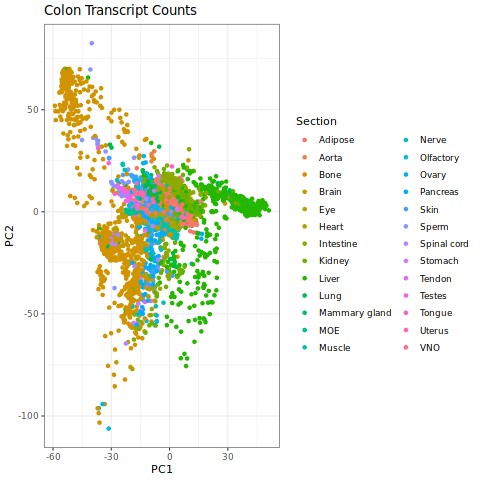

In [23]:
%%R
# ggplot2::ggplot(pca_pca.df) +
#   geom_point(aes(x=PC1,y=PC2,colour=Section)) +
#   theme_bw() +
#   ggtitle("Colon Reactions' 1st PC's")

ggplot2::ggplot(vst.count.mtx.train_pca.df) +
  geom_point(aes(x=PC1,y=PC2,colour=Section)) +
  theme_bw() +
  ggtitle("Colon Transcript Counts")

In [32]:
%%R
print(vst.count.mtx.train_pca.df$sample)

   [1] "SRR10242499" "SRR5448480"  "SRR1818191"  "SRR10399925" "SRR9274528" 
   [6] "SRR5273667"  "SRR8858549"  "SRR7161669"  "SRR3593526"  "SRR2762384" 
  [11] "SRR10400074" "SRR6221746"  "SRR5641735"  "SRR6811956"  "SRR2422981" 
  [16] "SRR10063795" "SRR6729590"  "SRR10067626" "SRR1618865"  "SRR5464188" 
  [21] "SRR2119711"  "SRR1158521"  "SRR8844301"  "SRR9029917"  "ERR2704933" 
  [26] "SRR9026495"  "SRR5275524"  "SRR1636594"  "SRR10067354" "SRR8641121" 
  [31] "SRR7721295"  "SRR8474311"  "ERR657462"   "SRR4188763"  "ERR450641"  
  [36] "SRR5083376"  "SRR7162045"  "SRR1810237"  "SRR8641068"  "SRR9029902" 
  [41] "ERR2362957"  "SRR786450"   "SRR7161314"  "SRR6488912"  "SRR7162109" 
  [46] "DRR075478"   "SRR4216973"  "SRR1209755"  "SRR9937433"  "SRR10031012"
  [51] "SRR9302917"  "SRR6900418"  "SRR2153309"  "SRR7161715"  "SRR9029912" 
  [56] "SRR6488930"  "SRR5099216"  "ERR2654308"  "ERR473964"   "SRR10399856"
  [61] "SRR10063789" "SRR10031011" "SRR6680513"  "SRR10400031" "SRR1660820" 

[1061] "SRR9062552"  "SRR10063810" "SRR1313337"  "SRR10241195" "SRR7161395" 
[1066] "SRR7161396"  "SRR8757504"  "ERR569340"   "SRR5345501"  "SRR4228442" 
[1071] "SRR1209753"  "SRR4114359"  "SRR6680591"  "SRR9182336"  "SRR10067351"
[1076] "ERR2588659"  "ERR3016039"  "ERR1715313"  "SRR10242493" "SRR6828623" 
[1081] "SRR5894239"  "SRR7138591"  "SRR4298937"  "SRR5850848"  "SRR7427978" 
[1086] "SRR5720132"  "SRR1181725"  "SRR8995994"  "SRR7162096"  "SRR10399836"
[1091] "SRR10385387" "SRR10400070" "SRR1796713"  "SRR10015363" "ERR2654370" 
[1096] "SRR10067349" "SRR3156204"  "SRR4296492"  "SRR6754132"  "SRR7995516" 
[1101] "SRR2086345"  "SRR10242486" "SRR3117348"  "SRR3104263"  "SRR786445"  
[1106] "ERR2588609"  "SRR1944600"  "SRR2033458"  "SRR5097520"  "SRR6221709" 
[1111] "SRR4017865"  "DRR015073"   "SRR2762383"  "SRR10523594" "ERR2812393" 
[1116] "ERR2654390"  "SRR8874827"  "SRR3161653"  "SRR10399971" "SRR8066573" 
[1121] "SRR5517151"  "SRR7537442"  "SRR9057212"  "SRR850585"   "SRR1592553" 

[2121] "SRR5641740"  "SRR10467058" "SRR6488923"  "ERR2930264"  "SRR5275565" 
[2126] "SRR4043641"  "SRR4298943"  "SRR1539270"  "SRR10399959" "SRR7181104" 
[2131] "ERR1709719"  "SRR850583"   "SRR1002635"  "SRR7162036"  "SRR5088690" 
[2136] "SRR6250999"  "ERR1082770"  "SRR3117290"  "SRR4000509"  "SRR3356726" 
[2141] "ERR3233426"  "SRR7161377"  "ERR2588603" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 "SRR9182299"  "SRR6652621"  "SRR10015367" "SRR2984059" 
[3491] "SRR7771842"  "SRR1105576"  "SRR8690244"  "SRR6819432"  "SRR8064931" 
[3496] "SRR7161322"  "SRR9317376"  "SRR9317852"  "ERR1121499"  "SRR4249656" 
[3501] "SRR3161696"  "SRR10400181" "SRR5572194"  "SRR10428296" "SRR3180546" 
[3506] "SRR4017867"  "ERR1709731"  "SRR5328919"  "SRR3355769"  "SRR850586"  
[3511] "SRR4000883"  "SRR6221718"  "SRR7161923"  "SRR1002639"  "ERR2654304" 
[3516] "SRR8833220"  "SRR9026486"  "ERR2275557"  "SRR8181932"  "SRR8369872" 
[3521] "SRR5870970"  "SRR6282671"  "SRR10067621" "DRR192182"   "ERR473961"  
[3526] "SRR10242488" "SRR5127013"  "SRR10350430" "ERR038239"   "ERR3771185" 
[3531] "SRR2086413"  "SRR7161362"  "SRR10108646" "SRR649371"   "SRR9302920" 
[3536] "SRR3586195"  "SRR8929807"  "SRR10241180" "SRR5464242"  "SRR5641739" 
[3541] "SRR449378"   "SRR3407354"  "SRR5641743"  "SRR9179027"  "SRR2984077" 
[3546] "SRR7721294"  "SRR8285571"  "SRR8980015"  "SRR6377162"  "ERR1709734" 
[3551] "SRR5863591"

[4546] "SRR9642671"  "DRR091734"   "SRR10399896" "ERR2654381"  "SRR9621230" 
[4551] "SRR5121121"  "ERR2588602"  "SRR6828620"  "SRR10031055" "SRR8844305" 
[4556] "SRR4216972"  "SRR1805827"  "DRR091790"   "SRR8370145"  "SRR10400023"
[4561] "SRR3104225"  "SRR5850869"  "SRR6488935"  "SRR9599710"  "SRR10124978"
[4566] "SRR3104255"  "DRR075468"   "SRR4298927"  "SRR1958830"  "SRR5275507" 
[4571] "ERR1082747"  "SRR3117280"  "SRR7992496"  "SRR5123127"  "SRR7161842" 
[4576] "SRR7695666"  "SRR3161691"  "SRR5901922"  "SRR1158599"  "SRR1636592" 
[4581] "ERR949463"   "SRR10400179" "SRR1209754"  "SRR5464216"  "SRR9937434" 
[4586] "SRR5855373"  "SRR5758662"  "SRR3161716"  "ERR1947921"  "SRR5275501" 
[4591] "ERR2518379"  "SRR8926354"  "SRR5758614"  "DRR091782"   "SRR3117332" 
[4596] "SRR10428300" "ERR2654368"  "SRR1137874"  "SRR7161450"  "ERR3418002" 
[4601] "ERR646898"   "ERR2764672"  "SRR6488921"  "SRR9302918"  "SRR6221754" 
[4606] "SRR7138195"  "SRR1810244"  "ERR2287710"  "SRR9166088"  "SRR3161692" 

[5606] "SRR7771849"  "SRR7161732"  "SRR3182909"  "SRR1137870"  "SRR8858535" 
[5611] "SRR3182842"  "SRR10031056" "SRR2984109"  "SRR7360464"  "SRR3180551" 
[5616] "SRR2984080"  "SRR5007786"  "SRR10523586" "SRR8474352"  "SRR1462382" 
[5621] "SRR10399849" "SRR9830550"  "SRR1556528"  "SRR5576357"  "ERR450636"  
[5626] "SRR5273705"  "SRR5641734"  "SRR10400122" "SRR5471206"  "SRR4174043" 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
%%R
# library(plotly)
# library(RColorBrewer)

# num_colors_needed <- length(unique(vst.count.mtx.train_pca.df$Section))
# colors <- colorRampPalette(brewer.pal(min(8, num_colors_needed), "Set2"))(num_colors_needed)


# plot <- plotly::plot_ly(data = vst.count.mtx.train_pca.df,
#                         x = ~PC1,
#                         y = ~PC2,
#                         z = ~PC3,
#                         type = "scatter3d", 
#                         mode = "markers",  # Correct setting for mode
#                         color = ~Section,  # This will automatically use Plotly's color scale if 'Section' is a factor
#                         text = ~paste("Sample_ID:", sample),  # Ensure Sample_ID is available in the dataframe
#                         size=1)  # Set size within marker list
if (!"sample" %in% names(vst.count.mtx.train_pca.df)) {
  stop("The 'sample' column does not exist in the dataframe.")
}

plot <- plotly::plot_ly(x=vst.count.mtx.train_pca.df$PC1,
        y=vst.count.mtx.train_pca.df$PC2,
        z=vst.count.mtx.train_pca.df$PC3,
        type="scatter3d", 
        mode="markers",
        color=vst.count.mtx.train_pca.df$Section, 
        text = ~paste("Sample_ID:", vst.count.mtx.train_pca.df$sample),
        size = 1)

htmlwidgets::saveWidget(plot, "vst_count_plot.html")

In addition: Warning messages:
1: In RColorBrewer::brewer.pal(N, "Set2") :
  n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors

2: In RColorBrewer::brewer.pal(N, "Set2") :
  n too large, allowed maximum for palette Set2 is 8
Returning the palette you asked for with that many colors

